### Importing the packages required to load the .feat file, scipy, and declaring the variables 


In [1]:
from sklearn.datasets import load_svmlight_file
from joblib import Memory
import scipy
mem = Memory("./mycache")
## Declaring the positive, negative class variable and assigning to 1 as default value which alters in the course of programme
positive_class = 1
negative_class = 0
## training, testing boolean value array constructed from train and test target data values. All the movie reviews >=7 are 1 and <=4 are 0.
training_data_boolean_array = []
testing_data_boolean_array = []

### Methods to load the Training and Testing feat files and store them in variables. Caching the results to load the data from cache memory to avoid latency

In [2]:
@mem.cache
def get_training_data():
    path_feat_file_train = 'C:\\Users\\chait\\OneDrive\\Documents\\NaturalLanguageProcessing\\Assignments\\Assignment_2\\train\\labeledBow.feat'
    data = load_svmlight_file(path_feat_file_train)
    return data[0], data[1]
X_train, Y_train = get_training_data()

@mem.cache
def get_test_data():
    path_feat_file_test = 'C:\\Users\\chait\\OneDrive\\Documents\\NaturalLanguageProcessing\\Assignments\\Assignment_2\\test\\labeledBow.feat'
    data = load_svmlight_file(path_feat_file_test)
    return data[0], data[1]
X_test, Y_test = get_test_data()


________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-chait-OneDrive-Documents-NaturalLanguageProcessing-Assignments-Assignment_2-__ipython-input__.get_training_data...
get_training_data()
________________________________________________get_training_data - 7.2s, 0.1min
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-chait-OneDrive-Documents-NaturalLanguageProcessing-Assignments-Assignment_2-__ipython-input__.get_test_data...
get_test_data()
____________________________________________________get_test_data - 4.5s, 0.1min


# PROBLEM 1
### get_precision(y_pred, y_true) is a method which accepts two parameters: 
### 1) y_pred : Boolean array consisting of 1, 0. It is the predicted 'Y' review values. 
### 2) y_true:   Boolean array consisting of 1,0. It is the actual 'Y' review values.
### MacroAverage Precision, Recall values are implemented in the below code. 
### Precission = (Precision1 + Precision2)/2
### Recall = (Recall1 + Recall2)/2

In [3]:
## Step 1
## y_pred is the predicted values of model in the form of array (positive) and (negative) reviews.
## y_true is the true values of model in the form of array  (positive) and (negative) reviews.
def get_precision(y_pred, y_true):
    True_Postive = 0
    True_Negative = 0
    False_Negative = 0
    False_Positive = 0
    global positive_class
    global negative_class

    ## iterate y_pred. prediction represents the index, and Actual represents the value(1,0)
    for prediction in enumerate(y_pred):
        predicted = prediction[1]
        Actual = y_true[prediction[0]]
    
        if predicted == Actual and predicted == positive_class:                 ## True Postive
            True_Postive = True_Postive + 1
        elif predicted == Actual and predicted == negative_class:               ## True Negative
            True_Negative = True_Negative + 1
        elif predicted == positive_class and Actual == negative_class:          ## False Postive
            False_Positive = False_Positive + 1
        elif predicted == negative_class and Actual == positive_class:          ## False Negative
            False_Negative = False_Negative + 1
    if (True_Postive == 0 and False_Negative == 0): ## Incase, Both are Zero and to avoid the divide by zero error. 
        Recall_1 = 0
    else:
        Recall_1 = round(True_Postive/(True_Postive + False_Negative), 3)  ## Calculate the Recall and round it to 3 values decimals.
    if (True_Postive == 0 and False_Positive == 0): ## Incase, Both are Zero and to avoid the divide by zero error. 
        Precision_1 = 0
    else:
        Precision_1 = round(True_Postive/(True_Postive + False_Positive), 3) ## calculate the precission values and round it to 3 value decimals.
    

    ## swap the positive and negative class to calculate the macro average to get the rpf for the other class
    temp = positive_class
    positive_class = negative_class
    negative_class = temp
    
    ## re-assigning all the values to zero. 
    True_Postive = 0
    True_Negative = 0
    False_Negative = 0
    False_Positive = 0

    for prediction in enumerate(y_pred):
        predicted = prediction[1]
        Actual = y_true[prediction[0]]
        
        ## True Postive
        if predicted == Actual and predicted == positive_class:
            True_Postive = True_Postive + 1
        elif predicted == Actual and predicted == negative_class:  ## True Negative
            True_Negative = True_Negative + 1
        elif predicted == positive_class and Actual == negative_class:          ## False Postive
            False_Positive = False_Positive + 1
        elif predicted == negative_class and Actual == positive_class:          ## False Negative
            False_Negative = False_Negative + 1
    
    if (True_Postive == 0 and False_Negative == 0):
        Recall_2 = 0
    else:
        Recall_2 = round(True_Postive/(True_Postive + False_Negative), 3)
    if (True_Postive == 0 and False_Positive == 0):
        Precision_2 = 0
    else:
        Precision_2 = round(True_Postive/(True_Postive + False_Positive), 3)
    

    Precision = round((Precision_1+Precision_2)/2, 3)
    Recall = round((Recall_1+Recall_2)/2, 3)
    FMeasure = round((2*Precision*Recall)/(Precision + Recall), 3)
    return [Recall, Precision, FMeasure]


## Util Methods to print Recall, Precision, FMeasure values and to Calculate and return the boolean review array from the  review array. 


In [4]:
### takes an array rpf, and prints the values.
def print_PRF(rpf):
    print('Recall       Precission          FMeasure')
    print(str(rpf[0])+'           '+str(rpf[1])+'               '+str(rpf[2]))
    
### takes the Reviews array consisting of values from 0-9. and returns boolean array based on the following logic. 
def Construct1and0Array_fromReviewArray(Reviews):
    boolean_array = []
    for review in Reviews:
        if review <=4:
            boolean_array.append(negative_class)
        elif review>=7:
            boolean_array.append(positive_class)
    return boolean_array

# PROBLEM 2
### Majority Class Baseline: In this method, we are setting the predicted_y review values to the majority class review found in the training data. 

In [5]:

## Step - 2
## training_data is the training_data with 1 and 0 
def Majority_ClassBaseline():
    global positive_class
    global negative_class
    global training_data_boolean_array
    global testing_data_boolean_array
    
    training_data_boolean_array = Construct1and0Array_fromReviewArray(Y_train)
    testing_data_boolean_array  = Construct1and0Array_fromReviewArray(Y_test)
    
    postive_class_count = len([x for x in training_data_boolean_array if x == 1])
    negative_class_count = len([x for x in training_data_boolean_array if x == 0])

    if postive_class_count > negative_class_count:
         positive_class = 1
         negative_class = 0
    else:
         positive_class = 0
         negative_class = 1
    ## creating the test and train prediction data based on the majority class found. 
    y_pred_test = [positive_class]*len(testing_data_boolean_array)
    y_pred_train = [positive_class]*len(training_data_boolean_array)
    
    test_data_rpf  = get_precision(y_pred_test, testing_data_boolean_array)
    train_data_rpf  = get_precision(y_pred_train, training_data_boolean_array)
    print('------- TRAINING SET ----------')
    print_PRF(train_data_rpf)
    print('------- TESTING SET ----------')
    print_PRF(test_data_rpf)
    
Majority_ClassBaseline()


------- TRAINING SET ----------
Recall       Precission          FMeasure
0.5           0.25               0.333
------- TESTING SET ----------
Recall       Precission          FMeasure
0.5           0.25               0.333


# PROBLEM 3
### Length_Baseline(): In the following implementation, I have choosen, three thresholds 20, 90, 140. Among'st all three of them, 90 proved to be the best fit threshold value giving Precision and Recall values of 54%. where as 20 becomes underfit threshold and 140 does not derive satisfactory results. 

In [6]:
## Step-3
def Length_Baseline(threshold):
    y_pred = []
    y_test_pred = []
    global positive_class
    global negative_class
    global training_data_boolean_array
    global training_data_boolean_array
    
    positive_class = 1
    negative_class = 0
    
    ### iterating through the shape of the training data set i.e 25,000 and calculating number of words per each document.
    for i in range(X_train.shape[0]):
        cx = scipy.sparse.coo_matrix(X_train[i])
        count_ofwords_in_document = 0
        for i,j,v in zip(cx.row, cx.col, cx.data):
            count_ofwords_in_document = count_ofwords_in_document + int(v)
        if count_ofwords_in_document > threshold:
            y_pred.append(positive_class)
        else:
            y_pred.append(negative_class) 
            
    print('TRAINING SET')
    print('----------------')
    print_PRF(get_precision(y_pred, training_data_boolean_array))
    
    ### iterating through the shape of the training data set i.e 25,000 and calculating number of words per each document.
    for i in range(X_test.shape[0]):
        cx = scipy.sparse.coo_matrix(X_test[i])
        count_ofwords_in_document = 0
        for i,j,v in zip(cx.row, cx.col, cx.data):
            count_ofwords_in_document = count_ofwords_in_document + int(v)
        if count_ofwords_in_document > threshold:
            y_test_pred.append(positive_class)
        else:
            y_test_pred.append(negative_class) 
    print('TESTING SET')
    print('----------------')
    print_PRF(get_precision(y_test_pred, testing_data_boolean_array))

print('**************  THRESHOLD 20 ***************')
Length_Baseline(20)
print('\n')
print('**************  THRESHOLD 90 ***************')
Length_Baseline(90)
print('\n')
print('********* THRESHOLD 140 **********')
Length_Baseline(140)


**************  THRESHOLD 20 ***************
TRAINING SET
----------------
Recall       Precission          FMeasure
0.5           0.584               0.539
TESTING SET
----------------
Recall       Precission          FMeasure
0.5           0.55               0.524


**************  THRESHOLD 90 ***************
TRAINING SET
----------------
Recall       Precission          FMeasure
0.488           0.466               0.477
TESTING SET
----------------
Recall       Precission          FMeasure
0.509           0.523               0.516


********* THRESHOLD 140 **********
TRAINING SET
----------------
Recall       Precission          FMeasure
0.495           0.494               0.494
TESTING SET
----------------
Recall       Precission          FMeasure
0.511           0.512               0.511


# PROBLEM 4

### Importing all the required packages from SKLearn. 
### Description:    Initially the Train Data has been further divided into 70% train data and 30% test data to calculate the accuracy of the Model on the Training Data. Since GaussianNB method does not accept Sparse matrix, both the X_train and X_test have been converted to Dense Matrices using todense() method. Further, both the Y_train and Y_test review array's have been converted to boolean array values using the Construct1and0Array_fromReviewArray Method from the Util Section. 

### ***********IMPORTANT********  
### A Boolean Flag 'IsLoadFromPickle' has been created to either load the model directly from the disk or create and save the model. This approach has been followed due to memory error issues. 

### IF IsLoadFromPickle = False, Then Create the Model, Train and then save it onto the disk. 
### ELSE IF IsLoadFromPickle = True, Then directly load the model from the disk and predict the outcome.
### After Training on the Training Data, and testing on the test partition, following are the scores of the model. 
### Recall = 0.694
### Precision = 0.699
### FMeasure = 0.696

In [7]:
## Step 4 Gaussian NB Classifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import _pickle as cPickle
from sklearn.preprocessing import normalize
import numpy as np 
IsLoadFromPickle = False

X_partition_train, X_partition_test, Y_partition_train, Y_partition_test = train_test_split(X_train, Y_train, test_size=0.33) ## divide the training data to 67 % training set and 33% testing set3
    
Dense_X_partition_train = X_partition_train.todense()    ### converting training data X from sparse matrix to dense matrix. 
Dense_X_partition_test = X_partition_test.todense()
    
boolean_Y_partition_train = Construct1and0Array_fromReviewArray(Y_partition_train) ### convert review arrays to boolean arrays
boolean_Y_partition_test = Construct1and0Array_fromReviewArray(Y_partition_test)

### Training the Model 

In [ ]:
## Train the model.
if(not IsLoadFromPickle):
    NaiveBayesClassifier = GaussianNB()
    NaiveBayesClassifier.fit(Dense_X_partition_train, boolean_Y_partition_train)
    ### code to save the model
    with open('NB_Classifier.pkl', 'wb') as fid:
        cPickle.dump(NaiveBayesClassifier, fid) 
    print('ACCURACY REPORT OF MODEL TESTED ON TRAINING DATA')
    print('--------------------------------------------------------------')
    predict_boolean_y_test = NaiveBayesClassifier.predict(Dense_X_partition_test)
    print_PRF(get_precision(predict_boolean_y_test, boolean_Y_partition_test))
else:
    with open('NB_Classifier.pkl', 'rb') as fid:
        NBClassified_loaded = cPickle.load(fid)
        
    predict_boolean_y_partition_test = NBClassified_loaded.predict(Dense_X_partition_test)
    print_PRF(get_precision(predict_boolean_y_partition_test, boolean_Y_partition_test))

### The Following Cell is for Running the model on Test Data. The Test Data is divided into batches and run seperately and finally the resultant Y_array is compared against the Y_Actual and below is the accuracy report. The Model is loaded from the disk, since it is saved in the disk if the previous cell is succesfully executed.
### Recall: 0.599
### Precision: 0.605
### FMeasure: 0.602

In [13]:
with open('NB_Classifier.pkl', 'rb') as fid:
        NBClassified_loaded = cPickle.load(fid)
Dense_X_test = X_test.todense()  
### Code to normalize the test shape to the train data set shape by adding extra zero columns
Normalized_Dense_X_test = np.zeros((Dense_X_test.shape[0], Dense_X_test.shape[1]+4))
Normalized_Dense_X_test[:,:-4] = Dense_X_test

final_y_test = []
### Each time a batch of 1000 documents are predicted and the result prediction is appended to the final_y_test array.
batch = 1000
iterations = int(Normalized_Dense_X_test.shape[0] / batch)
for iter in range(iterations):
    predict_Y_test = NBClassified_loaded.predict(Normalized_Dense_X_test[iter*batch:batch+iter*batch])
    final_y_test.extend(predict_Y_test)

print('ACCURACY REPORT OF MODEL TESTED ON TESTING DATA')
print('--------------------------------------------------------------')
print_PRF(get_precision(final_y_test, testing_data_boolean_array))



Recall       Precission          FMeasure
0.599           0.605               0.602


# PROBLEM 5
### Linear Support Vector Classification: This classifier is similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.  The model has been trained on Dense Paritition train data initially and tested on partition test data. and saved as pickle. 
### Accuracy Details: 
### Recall, Precision, Fmeasure: 0.864
# Training The model

In [7]:
from sklearn import svm
from sklearn.svm import LinearSVC
IsLoadFromPickle = False
if(not IsLoadFromPickle):
    print('entered')
    linearsvc_Classifier = LinearSVC(random_state=0, tol=1e-5)
    print('instance created')
    linearsvc_Classifier.fit(Dense_X_partition_train, boolean_Y_partition_train)
    print(' fit complete !!!! ')
    ### code to save the model
    with open('linearsvc_Classifier.pkl', 'wb') as fid:
        cPickle.dump(linearsvc_Classifier, fid) 
    print(' model saved !!!! ')
    print('ACCURACY REPORT OF MODEL TESTED ON TRAINING DATA')
    print('--------------------------------------------------------------')
    predict_boolean_y_test = linearsvc_Classifier.predict(Dense_X_partition_test)
    print_PRF(get_precision(predict_boolean_y_test, boolean_Y_partition_test))
else:
    print('in else')
    with open('linearsvc_Classifier.pkl', 'rb') as fid:
        linearsvm_Classifier_loaded = cPickle.load(fid)
        
    predict_boolean_y_partition_test = linearsvm_Classifier_loaded.predict(Dense_X_partition_test)
    print_PRF(get_precision(predict_boolean_y_partition_test, boolean_Y_partition_test))
        



entered
instanc created


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 fit complete !!!! 
 model saved !!!! 
ACCURACY REPORT OF MODEL TESTED ON TRAINING DATA
--------------------------------------------------------------
Recall       Precission          FMeasure
0.864           0.864               0.864


# Testing the Model

In [8]:
with open('linearsvc_Classifier.pkl', 'rb') as fid:
        linearsvm_Classifier_loaded = cPickle.load(fid)
Dense_X_test = X_test.todense()  
### Code to normalize the test shape to the train data set shape by adding extra zero columns
Normalized_Dense_X_test = np.zeros((Dense_X_test.shape[0], Dense_X_test.shape[1]+4))
Normalized_Dense_X_test[:,:-4] = Dense_X_test

final_y_test = []
### Each time a batch of 1000 documents are predicted and the result prediction is appended to the final_y_test array.
batch = 1000
iterations = int(Normalized_Dense_X_test.shape[0] / batch)
for iter in range(iterations):
    predict_Y_test = linearsvm_Classifier_loaded.predict(Normalized_Dense_X_test[iter*batch:batch+iter*batch])
    final_y_test.extend(predict_Y_test)

print('ACCURACY REPORT OF MODEL TESTED ON TESTING DATA')
print('--------------------------------------------------------------')
print_PRF(get_precision(final_y_test, testing_data_boolean_array))


ACCURACY REPORT OF MODEL TESTED ON TESTING DATA
--------------------------------------------------------------
Recall       Precission          FMeasure
0.152           0.153               0.152


#  PROBLEM 6:   Observation Report:
### Problem 2 (Majority Class Baseline):   This classifier resuted in Precision, FMeasure of 0.25 and 0.33, with Recall of 0.5. Which suggests, The FalsePositive's outnumbered the FalseNegative's. Which means, More number of negative reviews are wrongly classified as positive reviews. 
### Problem 3 ( Review Length Baseline):  A graph plot was draw for Threshold against Recall, Precision, FMeasure. The following values are calculated from the taking thresholds, which were taken after taking the average of all words of documents from both positive and negative documents. 


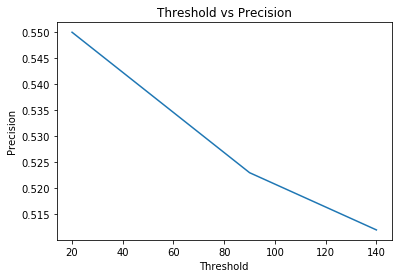

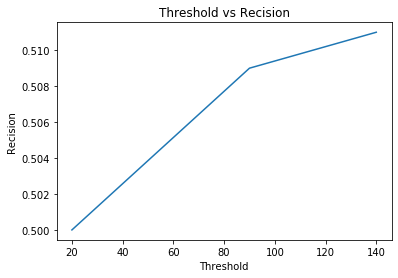

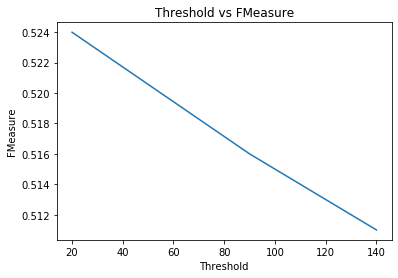

In [11]:
import matplotlib.pyplot as plt 
Threshold = [20, 90, 140]
Testing_set_Precision = [0.55, 0.523,  0.512]
Testing_set_Recall = [0.5, 0.509, 0.511]
Testing_set_FMeasure = [0.524, 0.516, 0.511]

plt.plot(Threshold, Testing_set_Precision)   
# naming the x axis 
plt.xlabel('Threshold') 
# naming the y axis 
plt.ylabel('Precision') 
  
# giving a title to my graph 
plt.title('Threshold vs Precision') 
# function to show the plot 
plt.show() 

plt.plot(Threshold, Testing_set_Recall)   
# naming the x axis 
plt.xlabel('Threshold') 
# naming the y axis 
plt.ylabel('Recision') 
  
# giving a title to my graph 
plt.title('Threshold vs Recall') 
# function to show the plot 
plt.show() 


plt.plot(Threshold, Testing_set_FMeasure)   
# naming the x axis 
plt.xlabel('Threshold') 
# naming the y axis 
plt.ylabel('FMeasure') 
  
# giving a title to my graph 
plt.title('Threshold vs FMeasure') 
# function to show the plot 
plt.show() 


### Problem 4, 5: The GaussianNB Classifier displayed, Recall, Precision, FMeasure of 0.59, 0.605, 0.602. Whereas the Linear SVC Classifier Predicted  0.86 Precision on Training, 0.15 Precision on Testing Data. Linear Classifier would not be sufficient to classify the above data. A polynomial classifier (non-linear) might lead to better accuracy because a linear line cannot evenly distribute the data. 

# PROBLEM 7
### In this problem we have taken two pretrained word-embeddings, word2vec and Glove. and by using Gensis we have constructed wordvectors objects. 
### In the following Cell, I am reading input file path of test-data which has the 8 categories data. and pre-process the data, and only include the data which was given in the Assingment 2 Question. 
### Due to the extreme size of the test data the data is read in chunks using generators. and each line is appeneded into list by tokenizing, which then results in yielding a list of lists. 

In [1]:
# imports needed and logging
import gzip
import gensim 
import logging
list_of_tokens = []
def read_input(input_file):
    process_line = False
    """This method reads the input file which is in gzip format"""
    with open(input_file, 'rb') as f:
        for i, line in enumerate(f):
            sentence = line.decode("utf-8")
            if ((':' in sentence) or ('//' in sentence)):
                if (('capital-world' in sentence) or ('currency' in sentence) or ('city-in-state' in sentence) or ('family' in sentence) or ('gram1-adjective-to-adverb' in sentence) or ('gram2-opposite' in sentence) or ('gram3-comparative' in sentence) or ('gram6-nationality-adjective' in sentence)):
                        process_line = True
                        continue
                else:
                    process_line = False
                    continue
            if process_line:
                yield gensim.utils.simple_preprocess(sentence)
            
tokens_gen = read_input('C:\\Users\\chait\\OneDrive\\Documents\\NaturalLanguageProcessing\\Assignments\\Assignment_2\\word-test.v1.txt')
for eachtoken_gen in tokens_gen:
    list_of_tokens.append(eachtoken_gen)


done


### Word2Vec Model Creation
### A Model is Created by loading the data from google bin file

In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

done


### Running the Word2Vec Gensim model against the test data for all the 8 categories. 
### The Entire Test Data (8 section groups) is ran across the model. 
### Sample, Test Data ran examples
### Sentence             ----------------------                                                Actual           ---------------            Predicted
### abuja nigeria accra ghana          ----------------------                    ghana     ----------------------                  madrid
### accra ghana bangkok thailand                   ----------------------        thailand       ----------------------                thailand
### athens greece berlin germany                       ----------------------         germany     ----------------------                  german
### bangkok thailand islamabad pakistan        ----------------------                  pakistan     ----------------------                  pakistan




In [ ]:
print('Actual Sentence                        Actual Word               Predicted Word')
for list_of_words in list_of_tokens:
    first = str(list_of_words[0])
    second = str(list_of_words[1])
    third = str(list_of_words[2])
    fourth = str(list_of_words[3])
    if((first in model.vocab) and (second in model.vocab) and (third in model.vocab) and (fourth in model.vocab)):
        print(' '.join(list_of_words)+'                 '+fourth+'                       '+model.most_similar(positive=[second, third], negative=[first], topn=1)[0][0])

Actual Sentence                        Actual Word               Predicted Word
abuja nigeria accra ghana                 ghana                       madrid
abuja nigeria amman jordan                 jordan                       mohammed
abuja nigeria ankara turkey                 turkey                       buba
abuja nigeria athens greece                 greece                       england
abuja nigeria baghdad iraq                 iraq                       iraqi
abuja nigeria bangkok thailand                 thailand                       thailand
abuja nigeria beijing china                 china                       chinese
abuja nigeria beirut lebanon                 lebanon                       barca
abuja nigeria berlin germany                 germany                       germany
abuja nigeria brussels belgium                 belgium                       gordon_brown
abuja nigeria cairo egypt                 egypt                       south_africa
abuja nigeria canberra 

bangkok thailand dhaka bangladesh                 bangladesh                       nepal
bangkok thailand doha qatar                 qatar                       Bahaar
bangkok thailand dublin ireland                 ireland                       nz
bangkok thailand havana cuba                 cuba                       asi
bangkok thailand helsinki finland                 finland                       rgb
bangkok thailand islamabad pakistan                 pakistan                       pakistan
bangkok thailand jakarta indonesia                 indonesia                       indonesia
bangkok thailand kabul afghanistan                 afghanistan                       ka_jawab
bangkok thailand kampala uganda                 uganda                       kenya
bangkok thailand kathmandu nepal                 nepal                       Tawang_Arunachal_Pradesh
bangkok thailand kiev ukraine                 ukraine                       amaranth_quinoa
beijing china beirut lebanon       

cairo egypt lima peru                 peru                       pepe
cairo egypt lisbon portugal                 portugal                       gareth
cairo egypt london england                 england                       europe
cairo egypt madrid spain                 spain                       real_madrid
cairo egypt manila philippines                 philippines                       manilla
canberra australia copenhagen denmark                 denmark                       canada
canberra australia dhaka bangladesh                 bangladesh                       india
canberra australia doha qatar                 qatar                       canada
canberra australia dublin ireland                 ireland                       canada
canberra australia havana cuba                 cuba                       canada
canberra australia helsinki finland                 finland                       buy_microsoft
canberra australia islamabad pakistan                 pakistan         

havana cuba islamabad pakistan                 pakistan                       pakistan
havana cuba jakarta indonesia                 indonesia                       sth
havana cuba kabul afghanistan                 afghanistan                       afghanistan
havana cuba kampala uganda                 uganda                       kenya
havana cuba kathmandu nepal                 nepal                       egypt
havana cuba kiev ukraine                 ukraine                       poland
havana cuba kingston jamaica                 jamaica                       springfield
havana cuba lima peru                 peru                       michigan
havana cuba lisbon portugal                 portugal                       michigan
havana cuba london england                 england                       america
havana cuba madrid spain                 spain                       barca
havana cuba manila philippines                 philippines                       sacramento
havana cuba 

kampala uganda paris france                 france                       europe
kampala uganda rome italy                 italy                       european
kathmandu nepal kiev ukraine                 ukraine                       niger
kathmandu nepal kingston jamaica                 jamaica                       jensen
kathmandu nepal lima peru                 peru                       moreno
kathmandu nepal lisbon portugal                 portugal                       ferguson
kathmandu nepal london england                 england                       adams
kathmandu nepal madrid spain                 spain                       ronaldinho
kathmandu nepal manila philippines                 philippines                       ano_ba
kathmandu nepal moscow russia                 russia                       russian
kathmandu nepal muscat oman                 oman                       gamay
kathmandu nepal nairobi kenya                 kenya                       kenya
kathmandu n

moscow russia paris france                 france                       lindsay_lohan
moscow russia rome italy                 italy                       charles
moscow russia stockholm sweden                 sweden                       obj
moscow russia tehran iran                 iran                       iran
moscow russia tokyo japan                 japan                       japan
moscow russia tripoli libya                 libya                       libya
moscow russia vienna austria                 austria                       obj
moscow russia warsaw poland                 poland                       Tilsit
muscat oman nairobi kenya                 kenya                       kenya
muscat oman nassau bahamas                 bahamas                       tch
muscat oman ottawa canada                 canada                       sic
muscat oman paris france                 france                       wif
muscat oman rome italy                 italy                       t

### Using Glove Embeddings
### First the glove embeddings has to be converted to Word2Vec format , so that we can use gensim models

In [11]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec('glove.twitter.27B.25d.txt', 'Word2VecTwitter.txt')

(1193514, 25)

### Load the the wordEmbeddings

In [12]:
GloveGensis_model = gensim.models.KeyedVectors.load_word2vec_format('Word2VecTwitter.txt', binary=False)

done


### Running the GloveEmbeddings  against the test data for all the 8 categories. 
### The Entire Test Data (8 section groups) is ran across the model. 
### Sample, Test Data ran examples
### Sentence             ----------------------                                                Actual           ---------------            Predicted
### abuja nigeria accra ghana         ----------------------                    ghana     ----------------------                  churchill
### abuja nigeria belgrade serbia                   ----------------------        serbia       ----------------------                serbia
### chisinau moldova helsinki finland                        ----------------------         finland     ----------------------                  finland





In [14]:
print('Actual Sentence                        Actual Word               Predicted Word')
for list_of_words in list_of_tokens:
    first = str(list_of_words[0])
    second = str(list_of_words[1])
    third = str(list_of_words[2])
    fourth = str(list_of_words[3])
    if((first in GloveGensis_model.vocab) and (second in GloveGensis_model.vocab) and (third in GloveGensis_model.vocab) and (fourth in GloveGensis_model.vocab)):
        print(' '.join(list_of_words)+'                 '+fourth+'                       '+GloveGensis_model.most_similar(positive=[second, third], negative=[first], topn=1)[0][0])

Actual Sentence                        Actual Word               Predicted Word
abuja nigeria accra ghana                 ghana                       churchill
abuja nigeria algiers algeria                 algeria                       lanka
abuja nigeria amman jordan                 jordan                       qatar
abuja nigeria ankara turkey                 turkey                       türkiye
abuja nigeria antananarivo madagascar                 madagascar                       fascism
abuja nigeria apia samoa                 samoa                       catalonia
abuja nigeria asmara eritrea                 eritrea                       sagitarius
abuja nigeria astana kazakhstan                 kazakhstan                       olympiakos
abuja nigeria athens greece                 greece                       germany
abuja nigeria baghdad iraq                 iraq                       assad
abuja nigeria baku azerbaijan                 azerbaijan                       adu
abuja n

algiers algeria gaborone botswana                 botswana                       cameroon
amman jordan ankara turkey                 turkey                       alan
amman jordan antananarivo madagascar                 madagascar                       damme
amman jordan apia samoa                 samoa                       gibson
amman jordan asmara eritrea                 eritrea                       awalnya
amman jordan astana kazakhstan                 kazakhstan                       harley
amman jordan athens greece                 greece                       plays
amman jordan baghdad iraq                 iraq                       shotgun
amman jordan baku azerbaijan                 azerbaijan                       duet
amman jordan bamako mali                 mali                       norris
amman jordan bangkok thailand                 thailand                       spotted
amman jordan beijing china                 china                       cover
amman jordan beirut le

antananarivo madagascar hanoi vietnam                 vietnam                       hollywood
antananarivo madagascar harare zimbabwe                 zimbabwe                       disneyland
apia samoa asmara eritrea                 eritrea                       sagitarius
apia samoa astana kazakhstan                 kazakhstan                       airforce
apia samoa athens greece                 greece                       wolves
apia samoa baghdad iraq                 iraq                       whales
apia samoa baku azerbaijan                 azerbaijan                       adu
apia samoa bamako mali                 mali                       congo
apia samoa bangkok thailand                 thailand                       thailand
apia samoa beijing china                 china                       australia
apia samoa beirut lebanon                 lebanon                       guinea
apia samoa belgrade serbia                 serbia                       barbados
apia samoa b

astana kazakhstan hanoi vietnam                 vietnam                       belarus
astana kazakhstan harare zimbabwe                 zimbabwe                       rajasthan
astana kazakhstan havana cuba                 cuba                       castle
astana kazakhstan helsinki finland                 finland                       finland
astana kazakhstan islamabad pakistan                 pakistan                       pakistan
astana kazakhstan jakarta indonesia                 indonesia                       italy
athens greece baghdad iraq                 iraq                       palestinians
athens greece baku azerbaijan                 azerbaijan                       berhak
athens greece bamako mali                 mali                       falklands
athens greece bangkok thailand                 thailand                       republic
athens greece beijing china                 china                       republic
athens greece beirut lebanon                 lebanon   

baku azerbaijan hanoi vietnam                 vietnam                       dusseldorf
baku azerbaijan harare zimbabwe                 zimbabwe                       keighley
baku azerbaijan havana cuba                 cuba                       barbados
baku azerbaijan helsinki finland                 finland                       switzerland
baku azerbaijan islamabad pakistan                 pakistan                       morocco
baku azerbaijan jakarta indonesia                 indonesia                       belgium
baku azerbaijan kabul afghanistan                 afghanistan                       arabia
baku azerbaijan kampala uganda                 uganda                       newfoundland
baku azerbaijan kathmandu nepal                 nepal                       herefordshire
bamako mali bangkok thailand                 thailand                       thailand
bamako mali beijing china                 china                       hong
bamako mali beirut lebanon                 l

beijing china harare zimbabwe                 zimbabwe                       monsanto
beijing china havana cuba                 cuba                       polar
beijing china helsinki finland                 finland                       rural
beijing china islamabad pakistan                 pakistan                       federal
beijing china jakarta indonesia                 indonesia                       daerah
beijing china kabul afghanistan                 afghanistan                       etmez
beijing china kampala uganda                 uganda                       uganda
beijing china kathmandu nepal                 nepal                       курения
beijing china khartoum sudan                 sudan                       monsanto
beijing china kiev ukraine                 ukraine                       civil
beijing china kigali rwanda                 rwanda                       monsanto
beijing china kingston jamaica                 jamaica                       ford
beiru

berlin germany doha qatar                 qatar                       oklahoma
berlin germany dublin ireland                 ireland                       ireland
berlin germany gaborone botswana                 botswana                       somaliland
berlin germany georgetown guyana                 guyana                       syracuse
berlin germany hanoi vietnam                 vietnam                       rajasthan
berlin germany harare zimbabwe                 zimbabwe                       falkland
berlin germany havana cuba                 cuba                       samoa
berlin germany helsinki finland                 finland                       croatia
berlin germany islamabad pakistan                 pakistan                       lanka
berlin germany jakarta indonesia                 indonesia                       indonesia
berlin germany kabul afghanistan                 afghanistan                       etme
berlin germany kampala uganda                 uganda       

bratislava slovakia budapest hungary                 hungary                       bulgaria
bratislava slovakia cairo egypt                 egypt                       lebanon
bratislava slovakia canberra australia                 australia                       croatia
bratislava slovakia caracas venezuela                 venezuela                       venezuela
bratislava slovakia chisinau moldova                 moldova                       followandgain
bratislava slovakia conakry guinea                 guinea                       l'algerie
bratislava slovakia copenhagen denmark                 denmark                       croatia
bratislava slovakia dakar senegal                 senegal                       ⚽
bratislava slovakia damascus syria                 syria                       taiji
bratislava slovakia dhaka bangladesh                 bangladesh                       taiji
bratislava slovakia doha qatar                 qatar                       uae
bratislava slov

bucharest romania khartoum sudan                 sudan                       haiti
bucharest romania kiev ukraine                 ukraine                       africa
bucharest romania kigali rwanda                 rwanda                       pangasinan
bucharest romania kingston jamaica                 jamaica                       sierra
bucharest romania libreville gabon                 gabon                       teamfollowdaibosyu
bucharest romania lilongwe malawi                 malawi                       haridwar
bucharest romania lima peru                 peru                       demi
bucharest romania lisbon portugal                 portugal                       echelon
bucharest romania ljubljana slovenia                 slovenia                       onlyin
bucharest romania london england                 england                       family
bucharest romania luanda angola                 angola                       s.a
bucharest romania lusaka zambia                 

canberra australia helsinki finland                 finland                       asia
canberra australia islamabad pakistan                 pakistan                       india
canberra australia jakarta indonesia                 indonesia                       indonesia
canberra australia kabul afghanistan                 afghanistan                       eden
canberra australia kampala uganda                 uganda                       israel
canberra australia kathmandu nepal                 nepal                       vietnam
canberra australia khartoum sudan                 sudan                       sudan
canberra australia kiev ukraine                 ukraine                       israel
canberra australia kigali rwanda                 rwanda                       vietnam
canberra australia kingston jamaica                 jamaica                       ford
canberra australia libreville gabon                 gabon                       kiev
canberra australia lilongwe malawi 

chisinau moldova minsk belarus                 belarus                       belarus
chisinau moldova mogadishu somalia                 somalia                       somalia
conakry guinea copenhagen denmark                 denmark                       horses
conakry guinea dakar senegal                 senegal                       polar
conakry guinea damascus syria                 syria                       border
conakry guinea dhaka bangladesh                 bangladesh                       plants
conakry guinea doha qatar                 qatar                       california
conakry guinea dublin ireland                 ireland                       found
conakry guinea gaborone botswana                 botswana                       охранника
conakry guinea georgetown guyana                 guyana                       buffalo
conakry guinea hanoi vietnam                 vietnam                       abandoned
conakry guinea harare zimbabwe                 zimbabwe          

dakar senegal lisbon portugal                 portugal                       saskatchewan
dakar senegal ljubljana slovenia                 slovenia                       thessaloniki
dakar senegal london england                 england                       singapore
dakar senegal luanda angola                 angola                       mcmaster
dakar senegal lusaka zambia                 zambia                       akwa
dakar senegal madrid spain                 spain                       spain
dakar senegal managua nicaragua                 nicaragua                       livonia
dakar senegal manama bahrain                 bahrain                       amman
dakar senegal manila philippines                 philippines                       mumbai
dakar senegal maputo mozambique                 mozambique                       perthshire
dakar senegal minsk belarus                 belarus                       ethiopia
dakar senegal mogadishu somalia                 somalia      

doha qatar jakarta indonesia                 indonesia                       indonesia
doha qatar kabul afghanistan                 afghanistan                       etme
doha qatar kampala uganda                 uganda                       ethiopia
doha qatar kathmandu nepal                 nepal                       iceland
doha qatar khartoum sudan                 sudan                       yemen
doha qatar kiev ukraine                 ukraine                       crimea
doha qatar kigali rwanda                 rwanda                       rwanda
doha qatar kingston jamaica                 jamaica                       ford
doha qatar libreville gabon                 gabon                       florange
doha qatar lilongwe malawi                 malawi                       холодильнику
doha qatar lima peru                 peru                       inter
doha qatar lisbon portugal                 portugal                       denmark
doha qatar ljubljana slovenia              

gaborone botswana muscat oman                 oman                       luxembourg
gaborone botswana nairobi kenya                 kenya                       lagos
gaborone botswana nassau bahamas                 bahamas                       barbados
gaborone botswana niamey niger                 niger                       areva
gaborone botswana nicosia cyprus                 cyprus                       eaton
gaborone botswana nouakchott mauritania                 mauritania                       brahimi
gaborone botswana nuuk greenland                 greenland                       wayland
georgetown guyana hanoi vietnam                 vietnam                       sarajevo
georgetown guyana harare zimbabwe                 zimbabwe                       misrata
georgetown guyana havana cuba                 cuba                       teotihuacan
georgetown guyana helsinki finland                 finland                       quetzaltenango
georgetown guyana islamabad pakistan  

harare zimbabwe lilongwe malawi                 malawi                       rajasthan
harare zimbabwe lima peru                 peru                       tim
harare zimbabwe lisbon portugal                 portugal                       celtic
harare zimbabwe ljubljana slovenia                 slovenia                       lanka
harare zimbabwe london england                 england                       city
harare zimbabwe luanda angola                 angola                       angola
harare zimbabwe lusaka zambia                 zambia                       uhuru
harare zimbabwe madrid spain                 spain                       barcelona
harare zimbabwe managua nicaragua                 nicaragua                       santander
harare zimbabwe manama bahrain                 bahrain                       pakistan
harare zimbabwe manila philippines                 philippines                       india
harare zimbabwe maputo mozambique                 mozambique         

helsinki finland oslo norway                 norway                       norge
helsinki finland ottawa canada                 canada                       ireland
helsinki finland paramaribo suriname                 suriname                       vaatstra
helsinki finland paris france                 france                       mars
helsinki finland podgorica montenegro                 montenegro                       tyrol
islamabad pakistan jakarta indonesia                 indonesia                       indonesia
islamabad pakistan kabul afghanistan                 afghanistan                       fark
islamabad pakistan kampala uganda                 uganda                       uganda
islamabad pakistan kathmandu nepal                 nepal                       iceland
islamabad pakistan khartoum sudan                 sudan                       yemen
islamabad pakistan kiev ukraine                 ukraine                       assad
islamabad pakistan kigali rwanda          

kabul afghanistan london england                 england                       marathon
kabul afghanistan luanda angola                 angola                       donington
kabul afghanistan lusaka zambia                 zambia                       idlewild
kabul afghanistan madrid spain                 spain                       munich
kabul afghanistan managua nicaragua                 nicaragua                       acropolis
kabul afghanistan manama bahrain                 bahrain                       kyiv
kabul afghanistan manila philippines                 philippines                       hawaii
kabul afghanistan maputo mozambique                 mozambique                       riptide
kabul afghanistan minsk belarus                 belarus                       chelyabinsk
kabul afghanistan mogadishu somalia                 somalia                       volgograd
kabul afghanistan monrovia liberia                 liberia                       canaveral
kabul afghanistan m

kathmandu nepal oslo norway                 norway                       camp
kathmandu nepal ottawa canada                 canada                       ohio
kathmandu nepal paramaribo suriname                 suriname                       usaid
kathmandu nepal paris france                 france                       france
kathmandu nepal podgorica montenegro                 montenegro                       timor
kathmandu nepal quito ecuador                 ecuador                       el
kathmandu nepal rabat morocco                 morocco                       lyon
kathmandu nepal riga latvia                 latvia                       goa
kathmandu nepal rome italy                 italy                       city
kathmandu nepal roseau dominica                 dominica                       caterham
khartoum sudan kiev ukraine                 ukraine                       crimea
khartoum sudan kigali rwanda                 rwanda                       rwanda
khartoum sudan ki

kigali rwanda maputo mozambique                 mozambique                       angola
kigali rwanda minsk belarus                 belarus                       euromaidan
kigali rwanda mogadishu somalia                 somalia                       libyan
kigali rwanda monrovia liberia                 liberia                       ethiopia
kigali rwanda montevideo uruguay                 uruguay                       chile
kigali rwanda moscow russia                 russia                       russia
kigali rwanda muscat oman                 oman                       arabia
kigali rwanda nairobi kenya                 kenya                       kenya
kigali rwanda nassau bahamas                 bahamas                       ghana
kigali rwanda niamey niger                 niger                       idf
kigali rwanda nicosia cyprus                 cyprus                       yemen
kigali rwanda nouakchott mauritania                 mauritania                       brahimi
kigali r

libreville gabon santiago chile                 chile                       san
libreville gabon skopje macedonia                 macedonia                       letran
libreville gabon sofia bulgaria                 bulgaria                       lucia
libreville gabon stockholm sweden                 sweden                       malmö
libreville gabon suva fiji                 fiji                       akd
lilongwe malawi lima peru                 peru                       diego
lilongwe malawi lisbon portugal                 portugal                       ghana
lilongwe malawi ljubljana slovenia                 slovenia                       tunisia
lilongwe malawi london england                 england                       york
lilongwe malawi luanda angola                 angola                       angola
lilongwe malawi lusaka zambia                 zambia                       b.c.
lilongwe malawi madrid spain                 spain                       barcelona
lilongwe m

london england taipei taiwan                 taiwan                       guangzhou
london england tallinn estonia                 estonia                       najaf
london england tashkent uzbekistan                 uzbekistan                       najaf
london england tbilisi georgia                 georgia                       armagh
london england tegucigalpa honduras                 honduras                       n.l.
luanda angola lusaka zambia                 zambia                       falkirk
luanda angola madrid spain                 spain                       barcelona
luanda angola managua nicaragua                 nicaragua                       nicaragua
luanda angola manama bahrain                 bahrain                       tahrir
luanda angola manila philippines                 philippines                       india
luanda angola maputo mozambique                 mozambique                       mozambique
luanda angola minsk belarus                 belarus     

madrid spain paris france                 france                       france
madrid spain podgorica montenegro                 montenegro                       parkersburg
madrid spain quito ecuador                 ecuador                       panama
madrid spain rabat morocco                 morocco                       penzance
madrid spain riga latvia                 latvia                       tybee
madrid spain rome italy                 italy                       norway
madrid spain roseau dominica                 dominica                       rugeley
madrid spain santiago chile                 chile                       orlando
madrid spain skopje macedonia                 macedonia                       lakota
madrid spain sofia bulgaria                 bulgaria                       samantha
madrid spain stockholm sweden                 sweden                       norway
madrid spain suva fiji                 fiji                       st.augustine
madrid spain taipei 

manila philippines mogadishu somalia                 somalia                       refugees
manila philippines monrovia liberia                 liberia                       harare
manila philippines montevideo uruguay                 uruguay                       michoacan
manila philippines moscow russia                 russia                       lebanon
manila philippines muscat oman                 oman                       башкортостан
manila philippines nairobi kenya                 kenya                       kenya
manila philippines nassau bahamas                 bahamas                       locals
manila philippines niamey niger                 niger                       separatism
manila philippines nicosia cyprus                 cyprus                       macmillan
manila philippines nouakchott mauritania                 mauritania                       beekeepers
manila philippines nuuk greenland                 greenland                       invercargill
manila phi

minsk belarus tallinn estonia                 estonia                       koln
minsk belarus tashkent uzbekistan                 uzbekistan                       s.korea
minsk belarus tbilisi georgia                 georgia                       ogden
minsk belarus tegucigalpa honduras                 honduras                       cavan
minsk belarus tehran iran                 iran                       parliament
minsk belarus tirana albania                 albania                       sagana
minsk belarus tokyo japan                 japan                       seoul
minsk belarus tripoli libya                 libya                       rajasthan
minsk belarus tunis tunisia                 tunisia                       tunisia
minsk belarus valletta malta                 malta                       monogram
mogadishu somalia monrovia liberia                 liberia                       warwickshire
mogadishu somalia montevideo uruguay                 uruguay                    

montevideo uruguay rabat morocco                 morocco                       sassuolo
montevideo uruguay riga latvia                 latvia                       torino
montevideo uruguay rome italy                 italy                       italy
montevideo uruguay roseau dominica                 dominica                       jovetic
montevideo uruguay santiago chile                 chile                       luis
montevideo uruguay skopje macedonia                 macedonia                       serbia
montevideo uruguay sofia bulgaria                 bulgaria                       malik
montevideo uruguay stockholm sweden                 sweden                       italy
montevideo uruguay suva fiji                 fiji                       jawan
montevideo uruguay taipei taiwan                 taiwan                       beijing
montevideo uruguay tallinn estonia                 estonia                       serbia
montevideo uruguay tashkent uzbekistan                 uzbe

nairobi kenya paramaribo suriname                 suriname                       генсек
nairobi kenya paris france                 france                       france
nairobi kenya podgorica montenegro                 montenegro                       irkutsk
nairobi kenya quito ecuador                 ecuador                       y
nairobi kenya rabat morocco                 morocco                       brest
nairobi kenya riga latvia                 latvia                       piazza
nairobi kenya rome italy                 italy                       hunt
nairobi kenya roseau dominica                 dominica                       smid
nairobi kenya santiago chile                 chile                       juan
nairobi kenya skopje macedonia                 macedonia                       outlaws
nairobi kenya sofia bulgaria                 bulgaria                       andrea
nairobi kenya stockholm sweden                 sweden                       liv
nairobi kenya suva fiji

nicosia cyprus nouakchott mauritania                 mauritania                       hinduism
nicosia cyprus nuuk greenland                 greenland                       chokey
nicosia cyprus oslo norway                 norway                       till
nicosia cyprus ottawa canada                 canada                       canada
nicosia cyprus paramaribo suriname                 suriname                       eurocrisis
nicosia cyprus paris france                 france                       france
nicosia cyprus podgorica montenegro                 montenegro                       tahrir
nicosia cyprus quito ecuador                 ecuador                       sale
nicosia cyprus rabat morocco                 morocco                       lyon
nicosia cyprus riga latvia                 latvia                       manila
nicosia cyprus rome italy                 italy                       europe
nicosia cyprus roseau dominica                 dominica                       qua

nuuk greenland tripoli libya                 libya                       russia
nuuk greenland tunis tunisia                 tunisia                       russia
nuuk greenland valletta malta                 malta                       turquoise
nuuk greenland vienna austria                 austria                       island
nuuk greenland vientiane laos                 laos                       лесу
nuuk greenland vilnius lithuania                 lithuania                       iceland
nuuk greenland warsaw poland                 poland                       zealand
nuuk greenland windhoek namibia                 namibia                       antarctica
nuuk greenland yerevan armenia                 armenia                       iceland
nuuk greenland zagreb croatia                 croatia                       russia
nuuk greenland abuja nigeria                 nigeria                       northern
nuuk greenland accra ghana                 ghana                       islands
nu

paramaribo suriname tallinn estonia                 estonia                       sarajevo
paramaribo suriname tashkent uzbekistan                 uzbekistan                       sarajevo
paramaribo suriname tbilisi georgia                 georgia                       kolkata
paramaribo suriname tegucigalpa honduras                 honduras                       almeria
paramaribo suriname tehran iran                 iran                       rwanda
paramaribo suriname tirana albania                 albania                       sanga
paramaribo suriname tokyo japan                 japan                       asia
paramaribo suriname tripoli libya                 libya                       kazakhstan
paramaribo suriname tunis tunisia                 tunisia                       oman
paramaribo suriname valletta malta                 malta                       nissan
paramaribo suriname vienna austria                 austria                       holland
paramaribo suriname vienti

quito ecuador rome italy                 italy                       sweden
quito ecuador roseau dominica                 dominica                       drogheda
quito ecuador santiago chile                 chile                       salvador
quito ecuador skopje macedonia                 macedonia                       uzbekistan
quito ecuador sofia bulgaria                 bulgaria                       barbara
quito ecuador stockholm sweden                 sweden                       finland
quito ecuador suva fiji                 fiji                       dalhousie
quito ecuador taipei taiwan                 taiwan                       taiwan
quito ecuador tallinn estonia                 estonia                       belgrade
quito ecuador tashkent uzbekistan                 uzbekistan                       leweb
quito ecuador tbilisi georgia                 georgia                       canberra
quito ecuador tegucigalpa honduras                 honduras                       

riga latvia apia samoa                 samoa                       sbw
riga latvia asmara eritrea                 eritrea                       sagitarius
riga latvia astana kazakhstan                 kazakhstan                       csk
riga latvia athens greece                 greece                       ireland
riga latvia baghdad iraq                 iraq                       dolphins
rome italy roseau dominica                 dominica                       mansuh
rome italy santiago chile                 chile                       argentina
rome italy skopje macedonia                 macedonia                       mataram
rome italy sofia bulgaria                 bulgaria                       camila
rome italy stockholm sweden                 sweden                       forza
rome italy suva fiji                 fiji                       pà
rome italy taipei taiwan                 taiwan                       taiwan
rome italy tallinn estonia                 estonia        

santiago chile algiers algeria                 algeria                       dhaka
santiago chile amman jordan                 jordan                       gcc
santiago chile ankara turkey                 turkey                       taksim
santiago chile antananarivo madagascar                 madagascar                       runfor
santiago chile apia samoa                 samoa                       rnli
santiago chile asmara eritrea                 eritrea                       sagitarius
santiago chile astana kazakhstan                 kazakhstan                       airforce
santiago chile athens greece                 greece                       norway
santiago chile baghdad iraq                 iraq                       boats
santiago chile baku azerbaijan                 azerbaijan                       سريع_زيادة_متابعين
santiago chile bamako mali                 mali                       tunis
santiago chile bangkok thailand                 thailand                      

stockholm sweden warsaw poland                 poland                       tunisia
stockholm sweden windhoek namibia                 namibia                       желайте
stockholm sweden yerevan armenia                 armenia                       oltl
stockholm sweden zagreb croatia                 croatia                       middlesbrough
stockholm sweden abuja nigeria                 nigeria                       missouri
stockholm sweden accra ghana                 ghana                       oltl
stockholm sweden algiers algeria                 algeria                       wisc.
stockholm sweden amman jordan                 jordan                       auspol
stockholm sweden ankara turkey                 turkey                       i̇zmir
stockholm sweden antananarivo madagascar                 madagascar                       остроту
stockholm sweden apia samoa                 samoa                       bioware
stockholm sweden asmara eritrea                 eritrea     

tallinn estonia abuja nigeria                 nigeria                       nigeria
tallinn estonia accra ghana                 ghana                       armenia
tallinn estonia algiers algeria                 algeria                       srilanka
tallinn estonia amman jordan                 jordan                       gcc
tallinn estonia ankara turkey                 turkey                       trabzon
tallinn estonia antananarivo madagascar                 madagascar                       falkland
tallinn estonia apia samoa                 samoa                       aviva
tallinn estonia asmara eritrea                 eritrea                       sagitarius
tallinn estonia astana kazakhstan                 kazakhstan                       ultras
tallinn estonia athens greece                 greece                       nz
tallinn estonia baghdad iraq                 iraq                       bombers
tallinn estonia baku azerbaijan                 azerbaijan                   

tegucigalpa honduras yerevan armenia                 armenia                       serbia
tegucigalpa honduras zagreb croatia                 croatia                       serbia
tegucigalpa honduras abuja nigeria                 nigeria                       kenya
tegucigalpa honduras accra ghana                 ghana                       latinoamerica
tegucigalpa honduras algiers algeria                 algeria                       afcon
tegucigalpa honduras amman jordan                 jordan                       gcc
tegucigalpa honduras ankara turkey                 turkey                       gezi
tegucigalpa honduras antananarivo madagascar                 madagascar                       faroe
tegucigalpa honduras apia samoa                 samoa                       ars
tegucigalpa honduras asmara eritrea                 eritrea                       sagitarius
tegucigalpa honduras astana kazakhstan                 kazakhstan                       ultras
tegucigalpa hondur

tokyo japan warsaw poland                 poland                       norway
tokyo japan windhoek namibia                 namibia                       станиславского
tokyo japan yerevan armenia                 armenia                       gambia
tokyo japan zagreb croatia                 croatia                       moldova
tokyo japan abuja nigeria                 nigeria                       b.c.
tokyo japan accra ghana                 ghana                       malawi
tokyo japan algiers algeria                 algeria                       rawalpindi
tokyo japan amman jordan                 jordan                       uae
tokyo japan ankara turkey                 turkey                       i̇zmir
tokyo japan antananarivo madagascar                 madagascar                       шинель
tokyo japan apia samoa                 samoa                       ioa
tokyo japan asmara eritrea                 eritrea                       sagitarius
tokyo japan astana kazakhstan     

valletta malta yerevan armenia                 armenia                       soweto
valletta malta zagreb croatia                 croatia                       loyola
valletta malta abuja nigeria                 nigeria                       university
valletta malta accra ghana                 ghana                       panem
valletta malta algiers algeria                 algeria                       loyola
valletta malta amman jordan                 jordan                       nola
valletta malta ankara turkey                 turkey                       kadıköy
valletta malta antananarivo madagascar                 madagascar                       soweto
valletta malta apia samoa                 samoa                       loyola
valletta malta asmara eritrea                 eritrea                       karir
valletta malta astana kazakhstan                 kazakhstan                       bosco
valletta malta athens greece                 greece                       dublin
val

vientiane laos conakry guinea                 guinea                       jrs
vientiane laos copenhagen denmark                 denmark                       derby
vilnius lithuania warsaw poland                 poland                       sweden
vilnius lithuania windhoek namibia                 namibia                       selanne
vilnius lithuania yerevan armenia                 armenia                       albania
vilnius lithuania zagreb croatia                 croatia                       serbia
vilnius lithuania abuja nigeria                 nigeria                       belfast
vilnius lithuania accra ghana                 ghana                       armenia
vilnius lithuania algiers algeria                 algeria                       afcon
vilnius lithuania amman jordan                 jordan                       croatia
vilnius lithuania ankara turkey                 turkey                       beşiktaş
vilnius lithuania antananarivo madagascar                 madaga

windhoek namibia canberra australia                 australia                       quebec
windhoek namibia caracas venezuela                 venezuela                       venezuela
windhoek namibia chisinau moldova                 moldova                       nadu
windhoek namibia conakry guinea                 guinea                       guinée
windhoek namibia copenhagen denmark                 denmark                       denmark
windhoek namibia dakar senegal                 senegal                       ultras
windhoek namibia damascus syria                 syria                       bangladesh
windhoek namibia dhaka bangladesh                 bangladesh                       bangladesh
yerevan armenia zagreb croatia                 croatia                       zenit
yerevan armenia abuja nigeria                 nigeria                       utah
yerevan armenia accra ghana                 ghana                       guatemala
yerevan armenia algiers algeria               

algeria dinar russia ruble                 ruble                       sponsor
algeria dinar sweden krona                 krona                       sponsor
algeria dinar thailand baht                 baht                       admin
algeria dinar usa dollar                 dollar                       twiter
algeria dinar vietnam dong                 dong                       sponsor
angola kwanza argentina peso                 peso                       hayy
angola kwanza armenia dram                 dram                       onam
angola kwanza brazil real                 real                       godbless
angola kwanza bulgaria lev                 lev                       godbless
angola kwanza cambodia riel                 riel                       dokunduysa
angola kwanza canada dollar                 dollar                       ma'am
angola kwanza croatia kuna                 kuna                       godbless
angola kwanza denmark krone                 krone             

croatia kuna argentina peso                 peso                       propia
croatia kuna armenia dram                 dram                       kwenye
croatia kuna brazil real                 real                       kama
croatia kuna bulgaria lev                 lev                       kama
croatia kuna cambodia riel                 riel                       yapabilirdim
croatia kuna canada dollar                 dollar                       kama
denmark krone europe euro                 euro                       を提供開始
denmark krone hungary forint                 forint                       ドドリア
denmark krone india rupee                 rupee                       ２０日間で安全
denmark krone iran rial                 rial                       ジャーナリズム
denmark krone japan yen                 yen                       を提供開始
denmark krone korea won                 won                       麻雀
denmark krone latvia lats                 lats                       lsk
denmark krone lithu

india rupee canada dollar                 dollar                       lifts
india rupee croatia kuna                 kuna                       czechs
india rupee denmark krone                 krone                       czechs
india rupee europe euro                 euro                       stakes
india rupee hungary forint                 forint                       billikens
iran rial japan yen                 yen                       alondra
iran rial korea won                 won                       aida
iran rial latvia lats                 lats                       nannis
iran rial lithuania litas                 litas                       aylu
iran rial macedonia denar                 denar                       aylu
iran rial malaysia ringgit                 ringgit                       aida
iran rial mexico peso                 peso                       guada
iran rial nigeria naira                 naira                       nannis
iran rial romania leu           

lithuania litas macedonia denar                 denar                       albertos
lithuania litas malaysia ringgit                 ringgit                       lembu
lithuania litas mexico peso                 peso                       corral
lithuania litas nigeria naira                 naira                       dancings
lithuania litas romania leu                 leu                       kielbasa
lithuania litas russia ruble                 ruble                       draymond
lithuania litas sweden krona                 krona                       gunnar
lithuania litas thailand baht                 baht                       softail
lithuania litas usa dollar                 dollar                       botox
lithuania litas vietnam dong                 dong                       florentine
lithuania litas algeria dinar                 dinar                       nationalised
lithuania litas angola kwanza                 kwanza                       bergara
lithuania litas 

mexico peso lithuania litas                 litas                       aanso
mexico peso macedonia denar                 denar                       cebinde
mexico peso malaysia ringgit                 ringgit                       otak
nigeria naira romania leu                 leu                       vdes
nigeria naira russia ruble                 ruble                       ammo
nigeria naira sweden krona                 krona                       synced
nigeria naira thailand baht                 baht                       ulta
nigeria naira usa dollar                 dollar                       creditos
nigeria naira vietnam dong                 dong                       takipçimi
nigeria naira algeria dinar                 dinar                       crtl
nigeria naira angola kwanza                 kwanza                       rafo
nigeria naira argentina peso                 peso                       u$
nigeria naira armenia dram                 dram                       

sweden krona mexico peso                 peso                       operacion
sweden krona nigeria naira                 naira                       mdel
sweden krona romania leu                 leu                       champa
sweden krona russia ruble                 ruble                       north-south
thailand baht usa dollar                 dollar                       ammo
thailand baht vietnam dong                 dong                       remittances
thailand baht algeria dinar                 dinar                       remittances
thailand baht angola kwanza                 kwanza                       barrancos
thailand baht argentina peso                 peso                       dollares
thailand baht armenia dram                 dram                       barrancos
thailand baht brazil real                 real                       cdns
thailand baht bulgaria lev                 lev                       rands
thailand baht cambodia riel                 riel        

chicago illinois mesa arizona                 arizona                       esquina
chicago illinois atlanta georgia                 georgia                       tulsa
chicago illinois omaha nebraska                 nebraska                       northridge
chicago illinois miami florida                 florida                       iowa
chicago illinois tulsa oklahoma                 oklahoma                       qld
chicago illinois oakland california                 california                       qld
chicago illinois cleveland ohio                 ohio                       arkansas
chicago illinois minneapolis minnesota                 minnesota                       sussex
chicago illinois wichita kansas                 kansas                       qld
chicago illinois arlington texas                 texas                       lanarkshire
chicago illinois bakersfield california                 california                       oxnard
chicago illinois tampa florida             

philadelphia pennsylvania plano texas                 texas                       solusyon
phoenix arizona dallas texas                 texas                       kentucky
phoenix arizona jacksonville florida                 florida                       arkansas
phoenix arizona indianapolis indiana                 indiana                       arkansas
phoenix arizona austin texas                 texas                       c'mon
phoenix arizona detroit michigan                 michigan                       kentucky
phoenix arizona memphis tennessee                 tennessee                       alabama
phoenix arizona boston massachusetts                 massachusetts                       oklahoma
phoenix arizona seattle washington                 washington                       kentucky
phoenix arizona denver colorado                 colorado                       kentucky
phoenix arizona baltimore maryland                 maryland                       kentucky
phoenix arizona

jacksonville florida cleveland ohio                 ohio                       texas
jacksonville florida minneapolis minnesota                 minnesota                       dubai
jacksonville florida wichita kansas                 kansas                       indiana
jacksonville florida arlington texas                 texas                       south
jacksonville florida bakersfield california                 california                       waco
jacksonville florida anaheim california                 california                       hawaii
jacksonville florida honolulu hawaii                 hawaii                       hawaii
jacksonville florida pittsburgh pennsylvania                 pennsylvania                       texas
jacksonville florida lexington kentucky                 kentucky                       south
jacksonville florida stockton california                 california                       georgia
jacksonville florida cincinnati ohio                 ohio         

detroit michigan boston massachusetts                 massachusetts                       ohio
detroit michigan seattle washington                 washington                       iowa
detroit michigan denver colorado                 colorado                       iowa
detroit michigan baltimore maryland                 maryland                       syracuse
detroit michigan nashville tennessee                 tennessee                       waterloo
detroit michigan louisville kentucky                 kentucky                       auburn
detroit michigan milwaukee wisconsin                 wisconsin                       wichita
detroit michigan portland oregon                 oregon                       iowa
detroit michigan tucson arizona                 arizona                       harrisburg
detroit michigan fresno california                 california                       slc
detroit michigan sacramento california                 california                       illinois
det

boston massachusetts arlington texas                 texas                       hempstead
boston massachusetts bakersfield california                 california                       paramus
boston massachusetts tampa florida                 florida                       pune
boston massachusetts anaheim california                 california                       oshawa
boston massachusetts honolulu hawaii                 hawaii                       danbury
boston massachusetts pittsburgh pennsylvania                 pennsylvania                       grimsby
boston massachusetts lexington kentucky                 kentucky                       morrisville
boston massachusetts stockton california                 california                       stanislaus
boston massachusetts cincinnati ohio                 ohio                       hampshire
boston massachusetts anchorage alaska                 alaska                       morrisville
boston massachusetts toledo ohio               

denver colorado madison wisconsin                 wisconsin                       barbara
denver colorado lubbock texas                 texas                       pompano
denver colorado garland texas                 texas                       fenton
denver colorado glendale arizona                 arizona                       scotia
denver colorado hialeah florida                 florida                       ananindeua
denver colorado reno nevada                 nevada                       hercules
baltimore maryland nashville tennessee                 tennessee                       dublin
baltimore maryland louisville kentucky                 kentucky                       arkansas
baltimore maryland milwaukee wisconsin                 wisconsin                       worcester
baltimore maryland portland oregon                 oregon                       ontario
baltimore maryland tucson arizona                 arizona                       harrisburg
baltimore maryland fresno

louisville kentucky tulsa oklahoma                 oklahoma                       tucson
louisville kentucky oakland california                 california                       philadelphia
louisville kentucky cleveland ohio                 ohio                       philadelphia
louisville kentucky minneapolis minnesota                 minnesota                       tucson
louisville kentucky wichita kansas                 kansas                       arkansas
louisville kentucky arlington texas                 texas                       tucson
louisville kentucky bakersfield california                 california                       chinatown
louisville kentucky tampa florida                 florida                       augusta
louisville kentucky anaheim california                 california                       highlands
louisville kentucky honolulu hawaii                 hawaii                       greenwich
louisville kentucky pittsburgh pennsylvania                 pennsyl

portland oregon madison wisconsin                 wisconsin                       troy
portland oregon lubbock texas                 texas                       witham
portland oregon garland texas                 texas                       fern
portland oregon glendale arizona                 arizona                       rhode
portland oregon hialeah florida                 florida                       lorain
portland oregon reno nevada                 nevada                       hercules
portland oregon scottsdale arizona                 arizona                       southwestern
portland oregon irving texas                 texas                       garnett
portland oregon fremont california                 california                       mesquite
portland oregon irvine california                 california                       appleton
portland oregon spokane washington                 washington                       grimsby
tucson arizona fresno california                 

sacramento california laredo texas                 texas                       vallarta
sacramento california chandler arizona                 arizona                       marshall
sacramento california madison wisconsin                 wisconsin                       lady
sacramento california lubbock texas                 texas                       springs
sacramento california garland texas                 texas                       carved
sacramento california glendale arizona                 arizona                       lakes
sacramento california hialeah florida                 florida                       suburban
sacramento california reno nevada                 nevada                       hercules
sacramento california scottsdale arizona                 arizona                       gardens
sacramento california irving texas                 texas                       marshall
sacramento california spokane washington                 washington                       north

omaha nebraska anaheim california                 california                       wanderers
omaha nebraska honolulu hawaii                 hawaii                       dorset
omaha nebraska pittsburgh pennsylvania                 pennsylvania                       oregon
omaha nebraska lexington kentucky                 kentucky                       plymouth
omaha nebraska stockton california                 california                       vanderbilt
omaha nebraska cincinnati ohio                 ohio                       pittsburgh
omaha nebraska anchorage alaska                 alaska                       sussex
omaha nebraska toledo ohio                 ohio                       oviedo
omaha nebraska plano texas                 texas                       vaga
omaha nebraska henderson nevada                 nevada                       gerrard
omaha nebraska orlando florida                 florida                       carolina
omaha nebraska laredo texas                 texas

tulsa oklahoma shreveport louisiana                 louisiana                       waco
tulsa oklahoma tacoma washington                 washington                       portland
tulsa oklahoma oxnard california                 california                       cumbria
tulsa oklahoma fontana california                 california                       marino
tulsa oklahoma akron ohio                 ohio                       alabama
tulsa oklahoma amarillo texas                 texas                       rojo
tulsa oklahoma glendale california                 california                       lagos
oakland california cleveland ohio                 ohio                       texas
oakland california minneapolis minnesota                 minnesota                       village
oakland california wichita kansas                 kansas                       arizona
oakland california arlington texas                 texas                       valley
oakland california tampa florida         

minneapolis minnesota glendale arizona                 arizona                       nebraska
minneapolis minnesota hialeah florida                 florida                       ucla
minneapolis minnesota reno nevada                 nevada                       pitt
minneapolis minnesota scottsdale arizona                 arizona                       arizona
minneapolis minnesota irving texas                 texas                       flacco
minneapolis minnesota fremont california                 california                       georgetown
minneapolis minnesota irvine california                 california                       hopkins
minneapolis minnesota spokane washington                 washington                       arkansas
minneapolis minnesota modesto california                 california                       faso
minneapolis minnesota shreveport louisiana                 louisiana                       tuscaloosa
minneapolis minnesota tacoma washington                 wa

bakersfield california pittsburgh pennsylvania                 pennsylvania                       city
bakersfield california lexington kentucky                 kentucky                       valley
bakersfield california cincinnati ohio                 ohio                       york
bakersfield california anchorage alaska                 alaska                       northern
bakersfield california toledo ohio                 ohio                       cruz
bakersfield california plano texas                 texas                       valor
bakersfield california henderson nevada                 nevada                       michael
bakersfield california orlando florida                 florida                       york
bakersfield california laredo texas                 texas                       mexico
bakersfield california chandler arizona                 arizona                       james
bakersfield california madison wisconsin                 wisconsin                       s

lexington kentucky madison wisconsin                 wisconsin                       pitt
lexington kentucky lubbock texas                 texas                       vanderbilt
lexington kentucky garland texas                 texas                       rudolph
lexington kentucky glendale arizona                 arizona                       wisconsin
lexington kentucky hialeah florida                 florida                       maryland
lexington kentucky reno nevada                 nevada                       pitt
lexington kentucky scottsdale arizona                 arizona                       arizona
lexington kentucky irving texas                 texas                       manning
lexington kentucky fremont california                 california                       nebraska
lexington kentucky irvine california                 california                       penn
lexington kentucky spokane washington                 washington                       wisconsin
lexington kent

plano texas modesto california                 california                       louisiana
plano texas shreveport louisiana                 louisiana                       plainfield
plano texas tacoma washington                 washington                       norfolk
plano texas oxnard california                 california                       knoxville
plano texas fontana california                 california                       bronx
plano texas akron ohio                 ohio                       oakland
plano texas glendale california                 california                       norfolk
plano texas tallahassee florida                 florida                       philly
plano texas huntsville alabama                 alabama                       knoxville
plano texas worcester massachusetts                 massachusetts                       brunswick
plano texas chicago illinois                 illinois                       philly
plano texas philadelphia pennsylvania   

laredo texas madison wisconsin                 wisconsin                       middle
laredo texas glendale arizona                 arizona                       south
laredo texas hialeah florida                 florida                       schools
laredo texas reno nevada                 nevada                       guard
laredo texas scottsdale arizona                 arizona                       south
laredo texas fremont california                 california                       south
laredo texas irvine california                 california                       bush
laredo texas spokane washington                 washington                       eastern
laredo texas modesto california                 california                       colorado
laredo texas shreveport louisiana                 louisiana                       schools
laredo texas tacoma washington                 washington                       north
laredo texas oxnard california                 california     

glendale arizona houston texas                 texas                       vs.
glendale arizona philadelphia pennsylvania                 pennsylvania                       bowl
glendale arizona dallas texas                 texas                       football
glendale arizona jacksonville florida                 florida                       kentucky
glendale arizona indianapolis indiana                 indiana                       denver
glendale arizona austin texas                 texas                       josh
glendale arizona detroit michigan                 michigan                       vs.
glendale arizona memphis tennessee                 tennessee                       cowboys
glendale arizona boston massachusetts                 massachusetts                       breaking
glendale arizona seattle washington                 washington                       bowl
glendale arizona denver colorado                 colorado                       bowl
glendale arizona baltimore

scottsdale arizona fremont california                 california                       minnesota
scottsdale arizona irvine california                 california                       penn
scottsdale arizona spokane washington                 washington                       oklahoma
scottsdale arizona modesto california                 california                       cholo
scottsdale arizona shreveport louisiana                 louisiana                       oklahoma
scottsdale arizona tacoma washington                 washington                       kansas
scottsdale arizona oxnard california                 california                       wisconsin
scottsdale arizona fontana california                 california                       ventura
scottsdale arizona akron ohio                 ohio                       alabama
scottsdale arizona amarillo texas                 texas                       rojo
scottsdale arizona glendale california                 california             

fremont california portland oregon                 oregon                       america
fremont california tucson arizona                 arizona                       colorado
fremont california mesa arizona                 arizona                       no
fremont california atlanta georgia                 georgia                       america
fremont california omaha nebraska                 nebraska                       america
fremont california miami florida                 florida                       america
fremont california tulsa oklahoma                 oklahoma                       florida
irvine california spokane washington                 washington                       northern
irvine california shreveport louisiana                 louisiana                       downtown
irvine california tacoma washington                 washington                       coast
irvine california akron ohio                 ohio                       florida
irvine california amarillo

modesto california denver colorado                 colorado                       chicago
modesto california baltimore maryland                 maryland                       coast
modesto california nashville tennessee                 tennessee                       nyc
modesto california louisville kentucky                 kentucky                       east
modesto california milwaukee wisconsin                 wisconsin                       coast
modesto california portland oregon                 oregon                       coast
modesto california tucson arizona                 arizona                       coast
modesto california mesa arizona                 arizona                       fm
modesto california atlanta georgia                 georgia                       nyc
modesto california omaha nebraska                 nebraska                       coast
modesto california miami florida                 florida                       live
modesto california tulsa oklahoma  

oxnard california worcester massachusetts                 massachusetts                       york
oxnard california chicago illinois                 illinois                       club
oxnard california houston texas                 texas                       club
oxnard california philadelphia pennsylvania                 pennsylvania                       york
oxnard california phoenix arizona                 arizona                       york
oxnard california dallas texas                 texas                       club
oxnard california jacksonville florida                 florida                       york
oxnard california indianapolis indiana                 indiana                       york
oxnard california austin texas                 texas                       lady
oxnard california detroit michigan                 michigan                       club
oxnard california memphis tennessee                 tennessee                       club
oxnard california boston massach

akron ohio tampa florida                 florida                       city
akron ohio anaheim california                 california                       russia
amarillo texas glendale california                 california                       athens
amarillo texas tallahassee florida                 florida                       newark
amarillo texas huntsville alabama                 alabama                       newark
amarillo texas worcester massachusetts                 massachusetts                       athens
amarillo texas chicago illinois                 illinois                       columbus
amarillo texas philadelphia pennsylvania                 pennsylvania                       columbus
amarillo texas phoenix arizona                 arizona                       columbus
amarillo texas jacksonville florida                 florida                       columbus
amarillo texas indianapolis indiana                 indiana                       columbus
amarillo texas de

tallahassee florida sacramento california                 california                       denver
tallahassee florida mesa arizona                 arizona                       cola
tallahassee florida atlanta georgia                 georgia                       miami
tallahassee florida omaha nebraska                 nebraska                       arizona
tallahassee florida tulsa oklahoma                 oklahoma                       denver
tallahassee florida oakland california                 california                       denver
tallahassee florida cleveland ohio                 ohio                       denver
tallahassee florida minneapolis minnesota                 minnesota                       york
tallahassee florida wichita kansas                 kansas                       michigan
tallahassee florida arlington texas                 texas                       south
tallahassee florida bakersfield california                 california                       philadelp

worcester massachusetts lexington kentucky                 kentucky                       pennsylvania
worcester massachusetts stockton california                 california                       governor
worcester massachusetts cincinnati ohio                 ohio                       ohio
boy girl brother sister                 sister                       sister
boy girl brothers sisters                 sisters                       sisters
boy girl dad mom                 mom                       mom
boy girl father mother                 mother                       mother
boy girl grandfather grandmother                 grandmother                       grandmother
boy girl grandpa grandma                 grandma                       grandma
boy girl grandson granddaughter                 granddaughter                       granddaughter
boy girl groom bride                 bride                       bride
boy girl he she                 she                       'd
boy girl 

father mother stepfather stepmother                 stepmother                       duckling
father mother stepson stepdaughter                 stepdaughter                       roundest
father mother uncle aunt                 aunt                       grandma
father mother boy girl                 girl                       girl
father mother brother sister                 sister                       sister
father mother brothers sisters                 sisters                       lady
father mother dad mom                 mom                       mom
grandfather grandmother grandpa grandma                 grandma                       grandma
grandfather grandmother grandson granddaughter                 granddaughter                       granddaughter
grandfather grandmother groom bride                 bride                       bride
grandfather grandmother he she                 she                       'd
grandfather grandmother his her                 her             

he she king queen                 queen                       queen
he she man woman                 woman                       i
he she nephew niece                 niece                       niece
he she policeman policewoman                 policewoman                       fireman
he she prince princess                 princess                       queen
he she son daughter                 daughter                       y'
he she sons daughters                 daughters                       princesses
he she stepbrother stepsister                 stepsister                       suitemate
he she stepfather stepmother                 stepmother                       stepmother
he she stepson stepdaughter                 stepdaughter                       stepfather
he she uncle aunt                 aunt                       kayla
he she boy girl                 girl                       girl
he she brother sister                 sister                       sister
he she broth

man woman his her                 her                       signs
man woman husband wife                 wife                       daughter
man woman king queen                 queen                       meets
nephew niece policeman policewoman                 policewoman                       inmate
nephew niece prince princess                 princess                       queen
nephew niece son daughter                 daughter                       mis
nephew niece sons daughters                 daughters                       films
nephew niece stepbrother stepsister                 stepsister                       step-mom
nephew niece stepfather stepmother                 stepmother                       stepmother
nephew niece stepson stepdaughter                 stepdaughter                       seabear
nephew niece uncle aunt                 aunt                       aunt
nephew niece boy girl                 girl                       girl
nephew niece brother sister    

sons daughters grandpa grandma                 grandma                       grandmother
sons daughters grandson granddaughter                 granddaughter                       grandfather
sons daughters groom bride                 bride                       granddaughter
sons daughters he she                 she                       told
sons daughters his her                 her                       birth
sons daughters husband wife                 wife                       grandmother
sons daughters king queen                 queen                       father
sons daughters man woman                 woman                       be
sons daughters nephew niece                 niece                       grandmother
sons daughters policeman policewoman                 policewoman                       stabs
sons daughters prince princess                 princess                       daughter
sons daughters son daughter                 daughter                       sus
stepbroth

uncle aunt stepbrother stepsister                 stepsister                       step-mom
uncle aunt stepfather stepmother                 stepmother                       great-grandmother
uncle aunt stepson stepdaughter                 stepdaughter                       heir
amazing amazingly apparent apparently                 apparently                       woefully
amazing amazingly calm calmly                 calmly                       irritated
amazing amazingly cheerful cheerfully                 cheerfully                       delightfully
amazing amazingly complete completely                 completely                       somewhat
amazing amazingly efficient efficiently                 efficiently                       decidedly
amazing amazingly fortunate fortunately                 fortunately                       keenly
amazing amazingly free freely                 freely                       cheap
amazing amazingly furious furiously                 furiously    

calm calmly unfortunate unfortunately                 unfortunately                       악행을
calm calmly usual usually                 usually                       unscathed
calm calmly amazing amazingly                 amazingly                       photographed
calm calmly apparent apparently                 apparently                       unhurt
cheerful cheerfully complete completely                 completely                       decline
cheerful cheerfully efficient efficiently                 efficiently                       objections
cheerful cheerfully fortunate fortunately                 fortunately                       idealize
cheerful cheerfully free freely                 freely                       refund
cheerful cheerfully furious furiously                 furiously                       testify
cheerful cheerfully happy happily                 happily                       followed
cheerful cheerfully immediate immediately                 immediately        

efficient efficiently unfortunate unfortunately                 unfortunately                       untrue
efficient efficiently usual usually                 usually                       afterwards
efficient efficiently amazing amazingly                 amazingly                       together
efficient efficiently apparent apparently                 apparently                       بالتجارب
efficient efficiently calm calmly                 calmly                       bother
efficient efficiently cheerful cheerfully                 cheerfully                       effortlessly
efficient efficiently complete completely                 completely                       properly
fortunate fortunately free freely                 freely                       card
fortunate fortunately furious furiously                 furiously                       scandal
fortunate fortunately happy happily                 happily                       yup
fortunate fortunately immediate immediately    

infrequent infrequently sudden suddenly                 suddenly                       scared
infrequent infrequently swift swiftly                 swiftly                       taylor
infrequent infrequently typical typically                 typically                       lulz
infrequent infrequently unfortunate unfortunately                 unfortunately                       frankly
infrequent infrequently usual usually                 usually                       blah
infrequent infrequently amazing amazingly                 amazingly                       yeah
infrequent infrequently apparent apparently                 apparently                       terrified
infrequent infrequently calm calmly                 calmly                       i.
infrequent infrequently cheerful cheerfully                 cheerfully                       weirdly
infrequent infrequently complete completely                 completely                       now
infrequent infrequently efficient efficie

obvious obviously amazing amazingly                 amazingly                       christmas
obvious obviously apparent apparently                 apparently                       suffering
obvious obviously calm calmly                 calmly                       always
obvious obviously cheerful cheerfully                 cheerfully                       dreamy
obvious obviously complete completely                 completely                       made
obvious obviously efficient efficiently                 efficiently                       safer
obvious obviously fortunate fortunately                 fortunately                       grateful
obvious obviously free freely                 freely                       store
obvious obviously furious furiously                 furiously                       performing
obvious obviously happy happily                 happily                       birthday
obvious obviously immediate immediately                 immediately                

precise precisely usual usually                 usually                       yikes
precise precisely amazing amazingly                 amazingly                       whoa
precise precisely apparent apparently                 apparently                       tragic
precise precisely calm calmly                 calmly                       sheesh
precise precisely cheerful cheerfully                 cheerfully                       mindblowing
precise precisely complete completely                 completely                       happened
precise precisely efficient efficiently                 efficiently                       mainly
precise precisely fortunate fortunately                 fortunately                       favored
precise precisely free freely                 freely                       fyi
precise precisely furious furiously                 furiously                       scandal
precise precisely happy happily                 happily                       yess
precise

quiet quietly usual usually                 usually                       immediately
quiet quietly amazing amazingly                 amazingly                       credits
quiet quietly apparent apparently                 apparently                       intensifies
quiet quietly calm calmly                 calmly                       immediately
quiet quietly cheerful cheerfully                 cheerfully                       lovingly
quiet quietly complete completely                 completely                       credits
quiet quietly efficient efficiently                 efficiently                       scanning
quiet quietly fortunate fortunately                 fortunately                       generously
quiet quietly free freely                 freely                       credits
quiet quietly furious furiously                 furiously                       the-beauty-of-words-blog
quiet quietly happy happily                 happily                       followed
quiet 

reluctant reluctantly complete completely                 completely                       fixed
reluctant reluctantly efficient efficiently                 efficiently                       repaired
reluctant reluctantly fortunate fortunately                 fortunately                       unharmed
reluctant reluctantly free freely                 freely                       grabs
reluctant reluctantly furious furiously                 furiously                       confirmed
reluctant reluctantly happy happily                 happily                       followed
reluctant reluctantly immediate immediately                 immediately                       extends
reluctant reluctantly infrequent infrequently                 infrequently                       tacked
reluctant reluctantly lucky luckily                 luckily                       finally
reluctant reluctantly most mostly                 mostly                       nearly
reluctant reluctantly obvious obviously  

slow slowly free freely                 freely                       enter
slow slowly furious furiously                 furiously                       verge
slow slowly happy happily                 happily                       sunshine
slow slowly immediate immediately                 immediately                       increasing
slow slowly infrequent infrequently                 infrequently                       창조적
slow slowly lucky luckily                 luckily                       crossed
slow slowly most mostly                 mostly                       shown
slow slowly obvious obviously                 obviously                       indicate
slow slowly occasional occasionally                 occasionally                       waning
slow slowly possible possibly                 possibly                       absence
slow slowly precise precisely                 precisely                       nبالإستغفار
slow slowly professional professionally                 profess

typical typically infrequent infrequently                 infrequently                       impl
typical typically lucky luckily                 luckily                       rarely
typical typically most mostly                 mostly                       generally
typical typically obvious obviously                 obviously                       necessarily
typical typically occasional occasionally                 occasionally                       delve
typical typically possible possibly                 possibly                       tends
typical typically precise precisely                 precisely                       deixá-la
typical typically professional professionally                 professionally                       designed
typical typically quick quickly                 quickly                       carefully
typical typically quiet quietly                 quietly                       tends
typical typically rapid rapidly                 rapidly                    

acceptable unacceptable ethical unethical                 unethical                       hypocrisy
acceptable unacceptable fortunate unfortunate                 unfortunate                       favored
acceptable unacceptable honest dishonest                 dishonest                       offended
acceptable unacceptable impressive unimpressive                 unimpressive                       shocking
acceptable unacceptable informed uninformed                 uninformed                       commits
acceptable unacceptable known unknown                 unknown                       committed
acceptable unacceptable likely unlikely                 unlikely                       commits
acceptable unacceptable logical illogical                 illogical                       immaturity
acceptable unacceptable pleasant unpleasant                 unpleasant                       doubtful
acceptable unacceptable possible impossible                 impossible                       situ

clear unclear pleasant unpleasant                 unpleasant                       heartening
clear unclear possible impossible                 impossible                       saddening
clear unclear possibly impossibly                 impossibly                       baffled
clear unclear productive unproductive                 unproductive                       disheartening
clear unclear rational irrational                 irrational                       discouraging
clear unclear reasonable unreasonable                 unreasonable                       unsurprising
clear unclear responsible irresponsible                 irresponsible                       outraged
clear unclear sure unsure                 unsure                       frankly
clear unclear tasteful distasteful                 distasteful                       unenthusiastic
clear unclear acceptable unacceptable                 unacceptable                       discouraging
clear unclear aware unaware            

consistent inconsistent possibly impossibly                 impossibly                       legitimately
consistent inconsistent productive unproductive                 unproductive                       tiring
consistent inconsistent rational irrational                 irrational                       pessimistic
consistent inconsistent reasonable unreasonable                 unreasonable                       questionable
consistent inconsistent responsible irresponsible                 irresponsible                       incompetent
consistent inconsistent sure unsure                 unsure                       heck
consistent inconsistent tasteful distasteful                 distasteful                       kooky
consistent inconsistent acceptable unacceptable                 unacceptable                       repulsive
consistent inconsistent aware unaware                 unaware                       oblivious
consistent inconsistent certain uncertain                 uncertain

decided undecided reasonable unreasonable                 unreasonable                       pessimistic
decided undecided responsible irresponsible                 irresponsible                       dishonest
decided undecided sure unsure                 unsure                       unfair
decided undecided tasteful distasteful                 distasteful                       affec
decided undecided acceptable unacceptable                 unacceptable                       unhelpful
decided undecided aware unaware                 unaware                       unreasonable
decided undecided certain uncertain                 uncertain                       unimportant
decided undecided clear unclear                 unclear                       narrow
decided undecided comfortable uncomfortable                 uncomfortable                       pessimistic
decided undecided competitive uncompetitive                 uncompetitive                       headhunting
decided undecided con

fortunate unfortunate comfortable uncomfortable                 uncomfortable                       confusing
fortunate unfortunate competitive uncompetitive                 uncompetitive                       offensive
fortunate unfortunate consistent inconsistent                 inconsistent                       repetitive
fortunate unfortunate convincing unconvincing                 unconvincing                       accurate
fortunate unfortunate convenient inconvenient                 inconvenient                       accurate
fortunate unfortunate decided undecided                 undecided                       sentence
fortunate unfortunate efficient inefficient                 inefficient                       accuracy
fortunate unfortunate ethical unethical                 unethical                       scientific
honest dishonest impressive unimpressive                 unimpressive                       lackluster
honest dishonest informed uninformed                 uninf

informed uninformed convenient inconvenient                 inconvenient                       unreliable
informed uninformed decided undecided                 undecided                       stereotypical
informed uninformed efficient inefficient                 inefficient                       inefficient
informed uninformed ethical unethical                 unethical                       即日ｷｬｯｼﾝｸﾞ
informed uninformed fortunate unfortunate                 unfortunate                       kaybederler
informed uninformed honest dishonest                 dishonest                       hypocritical
informed uninformed impressive unimpressive                 unimpressive                       atrocious
known unknown likely unlikely                 unlikely                       critical
known unknown logical illogical                 illogical                       rational
known unknown pleasant unpleasant                 unpleasant                       observation
known unknown pos

possibly impossibly possible impossible                 impossible                       unapproachable
productive unproductive rational irrational                 irrational                       unbalanced
productive unproductive reasonable unreasonable                 unreasonable                       ludicrous
productive unproductive responsible irresponsible                 irresponsible                       punished
productive unproductive sure unsure                 unsure                       joke
productive unproductive tasteful distasteful                 distasteful                       kooky
productive unproductive acceptable unacceptable                 unacceptable                       revolting
productive unproductive aware unaware                 unaware                       unreasonable
productive unproductive certain uncertain                 uncertain                       notion
productive unproductive clear unclear                 unclear                     

responsible irresponsible sure unsure                 unsure                       silly
responsible irresponsible tasteful distasteful                 distasteful                       kooky
responsible irresponsible acceptable unacceptable                 unacceptable                       cringey
responsible irresponsible aware unaware                 unaware                       intimidating
responsible irresponsible certain uncertain                 uncertain                       idiotic
responsible irresponsible clear unclear                 unclear                       plain
responsible irresponsible comfortable uncomfortable                 uncomfortable                       bitchy
responsible irresponsible competitive uncompetitive                 uncompetitive                       cuntish
responsible irresponsible consistent inconsistent                 inconsistent                       touchy
responsible irresponsible convincing unconvincing                 unconvincin

cheap cheaper deep deeper                 deeper                       sight
cheap cheaper easy easier                 easier                       easier
cheap cheaper fast faster                 faster                       quicker
cheap cheaper good better                 better                       hopefully
cheap cheaper great greater                 greater                       although
cheap cheaper hard harder                 harder                       harder
cheap cheaper heavy heavier                 heavier                       levels
cheap cheaper high higher                 higher                       moving
cheap cheaper hot hotter                 hotter                       fun
cheap cheaper large larger                 larger                       larger
cheap cheaper long longer                 longer                       far
cheap cheaper loud louder                 louder                       nowhere
cheap cheaper low lower                 lower             

deep deeper good better                 better                       everything
deep deeper great greater                 greater                       success
deep deeper hard harder                 harder                       harder
deep deeper heavy heavier                 heavier                       edge
deep deeper high higher                 higher                       higher
deep deeper hot hotter                 hotter                       soft
deep deeper large larger                 larger                       larger
deep deeper long longer                 longer                       aside
deep deeper loud louder                 louder                       lurking
deep deeper low lower                 lower                       pressure
deep deeper new newer                 newer                       our
deep deeper old older                 older                       behind
deep deeper quick quicker                 quicker                       quicker
deep deeper

good better hard harder                 harder                       harder
good better heavy heavier                 heavier                       edge
good better high higher                 higher                       running
good better hot hotter                 hotter                       look
good better large larger                 larger                       medium
good better long longer                 longer                       either
good better loud louder                 louder                       scared
good better low lower                 lower                       fit
good better new newer                 newer                       the
good better old older                 older                       guy
good better quick quicker                 quicker                       trying
good better safe safer                 safer                       unless
good better sharp sharper                 sharper                       gauge
good better short shorter  

heavy heavier high higher                 higher                       shorter
heavy heavier hot hotter                 hotter                       prettier
heavy heavier large larger                 larger                       layers
heavy heavier long longer                 longer                       shorter
heavy heavier loud louder                 louder                       crazier
heavy heavier low lower                 lower                       smaller
heavy heavier new newer                 newer                       colours
heavy heavier old older                 older                       identical
heavy heavier quick quicker                 quicker                       quicker
heavy heavier safe safer                 safer                       happier
heavy heavier sharp sharper                 sharper                       fのバッテリー残量
heavy heavier short shorter                 shorter                       shorter
heavy heavier simple simpler                 simpl

hot hotter heavy heavier                 heavier                       lifted
hot hotter high higher                 higher                       tied
large larger long longer                 longer                       aside
large larger loud louder                 louder                       emotions
large larger low lower                 lower                       higher
large larger new newer                 newer                       our
large larger old older                 older                       showing
large larger quick quicker                 quicker                       faster
large larger safe safer                 safer                       priority
large larger sharp sharper                 sharper                       measured
large larger short shorter                 shorter                       shorter
large larger simple simpler                 simpler                       individual
large larger slow slower                 slower                      

loud louder high higher                 higher                       hearts
loud louder hot hotter                 hotter                       hearts
loud louder large larger                 larger                       larger
loud louder long longer                 longer                       hearts
low lower new newer                 newer                       our
low lower old older                 older                       middle
low lower quick quicker                 quicker                       further
low lower safe safer                 safer                       families
low lower sharp sharper                 sharper                       broader
low lower short shorter                 shorter                       larger
low lower simple simpler                 simpler                       similar
low lower slow slower                 slower                       avoid
low lower small smaller                 smaller                       larger
low lower smart smart

old older long longer                 longer                       enough
old older loud louder                 louder                       depressed
old older low lower                 lower                       less
old older new newer                 newer                       more
quick quicker safe safer                 safer                       affected
quick quicker sharp sharper                 sharper                       astray
quick quicker short shorter                 shorter                       shorter
quick quicker simple simpler                 simpler                       stronger
quick quicker slow slower                 slower                       feelings
quick quicker small smaller                 smaller                       smaller
quick quicker smart smarter                 smarter                       easily
quick quicker strong stronger                 stronger                       stronger
quick quicker tall taller                 taller         

slow slower hot hotter                 hotter                       bikinis
slow slower large larger                 larger                       larger
slow slower long longer                 longer                       drawn
slow slower loud louder                 louder                       crashing
slow slower low lower                 lower                       speeds
slow slower new newer                 newer                       sets
slow slower old older                 older                       entire
slow slower quick quicker                 quicker                       faster
slow slower safe safer                 safer                       safely
slow slower sharp sharper                 sharper                       speeds
slow slower short shorter                 shorter                       larger
slow slower simple simpler                 simpler                       similar
small smaller smart smarter                 smarter                       basic
small

strong stronger hot hotter                 hotter                       smell
strong stronger large larger                 larger                       larger
strong stronger long longer                 longer                       apart
strong stronger loud louder                 louder                       bugs
strong stronger low lower                 lower                       levels
strong stronger new newer                 newer                       added
strong stronger old older                 older                       grew
strong stronger quick quicker                 quicker                       faster
strong stronger safe safer                 safer                       anywhere
strong stronger sharp sharper                 sharper                       screws
strong stronger short shorter                 shorter                       similar
strong stronger simple simpler                 simpler                       similar
strong stronger slow slower              

tough tougher long longer                 longer                       fill
tough tougher loud louder                 louder                       cursing
tough tougher low lower                 lower                       lower
tough tougher new newer                 newer                       access
tough tougher old older                 older                       imaginary
tough tougher quick quicker                 quicker                       rethink
tough tougher safe safer                 safer                       allowing
tough tougher sharp sharper                 sharper                       offset
tough tougher short shorter                 shorter                       forms
tough tougher simple simpler                 simpler                       obligation
tough tougher slow slower                 slower                       prevent
tough tougher small smaller                 smaller                       assets
tough tougher smart smarter                 smarter

wide wider new newer                 newer                       existing
wide wider old older                 older                       abused
wide wider quick quicker                 quicker                       decrease
wide wider safe safer                 safer                       inconvenience
wide wider sharp sharper                 sharper                       proportionate
wide wider short shorter                 shorter                       acceptable
wide wider simple simpler                 simpler                       indispensable
wide wider slow slower                 slower                       restrain
wide wider small smaller                 smaller                       satisfactory
wide wider smart smarter                 smarter                       proportional
wide wider strong stronger                 stronger                       sincere
wide wider tall taller                 taller                       deceitful
wide wider tight tighter            

argentina argentinean denmark danish                 danish                       fixers
argentina argentinean egypt egyptian                 egyptian                       спасению
argentina argentinean england english                 english                       all-rounder
argentina argentinean france french                 french                       barbarity
argentina argentinean germany german                 german                       out-of-date
argentina argentinean greece greek                 greek                       suffragettes
argentina argentinean iceland icelandic                 icelandic                       обзавелась
argentina argentinean india indian                 indian                       unwitting
argentina argentinean ireland irish                 irish                       out-of-date
argentina argentinean israel israeli                 israeli                       unwitting
argentina argentinean italy italian                 italian            

austria austrian peru peruvian                 peruvian                       locsin
austria austrian poland polish                 polish                       roshan
austria austrian portugal portuguese                 portuguese                       heavyweight
austria austrian russia russian                 russian                       egyptian
austria austrian slovakia slovakian                 slovakian                       estonian
austria austrian spain spanish                 spanish                       australian
austria austrian sweden swedish                 swedish                       egyptian
austria austrian switzerland swiss                 swiss                       georgian
austria austrian thailand thai                 thai                       korean
austria austrian ukraine ukrainian                 ukrainian                       ugandan
austria austrian albania albanian                 albanian                       latvian
austria austrian argentina arg

cambodia cambodian denmark danish                 danish                       aussie
cambodia cambodian egypt egyptian                 egyptian                       egyptian
cambodia cambodian england english                 english                       scottish
cambodia cambodian france french                 french                       corps
cambodia cambodian germany german                 german                       australian
cambodia cambodian greece greek                 greek                       russians
cambodia cambodian iceland icelandic                 icelandic                       confederate
cambodia cambodian india indian                 indian                       indian
cambodia cambodian ireland irish                 irish                       canadian
cambodia cambodian israel israeli                 israeli                       armed
cambodia cambodian italy italian                 italian                       brazilian
cambodia cambodian japan japanese

china chinese spain spanish                 spanish                       irish
china chinese sweden swedish                 swedish                       irish
china chinese switzerland swiss                 swiss                       vienna
china chinese thailand thai                 thai                       korean
china chinese ukraine ukrainian                 ukrainian                       jewish
china chinese albania albanian                 albanian                       becauseof
china chinese argentina argentinean                 argentinean                       latin
china chinese australia australian                 australian                       irish
china chinese austria austrian                 austrian                       vienna
china chinese brazil brazilian                 brazilian                       thai
china chinese bulgaria bulgarian                 bulgarian                       glamberts
china chinese cambodia cambodian                 cambodian   

denmark danish israel israeli                 israeli                       inventor
denmark danish italy italian                 italian                       malay
denmark danish japan japanese                 japanese                       japanese
denmark danish korea korean                 korean                       model
denmark danish macedonia macedonian                 macedonian                       lithuanian
denmark danish malta maltese                 maltese                       grauman
denmark danish mexico mexican                 mexican                       santa
denmark danish moldova moldovan                 moldovan                       nadu
denmark danish netherlands dutch                 dutch                       sesame
denmark danish norway norwegian                 norwegian                       vietnamese
denmark danish peru peruvian                 peruvian                       futura
denmark danish poland polish                 polish               

england english australia australian                 australian                       science
england english austria austrian                 austrian                       literature
england english brazil brazilian                 brazilian                       do
england english bulgaria bulgarian                 bulgarian                       hogwarts
england english cambodia cambodian                 cambodian                       hebrew
england english chile chilean                 chilean                       escuela
england english china chinese                 chinese                       google
england english colombia colombian                 colombian                       cultura
england english croatia croatian                 croatian                       dqa
england english denmark danish                 danish                       arabic
france french germany german                 german                       raw
france french greece greek                 gre

greece greek peru peruvian                 peruvian                       latin
greece greek poland polish                 polish                       italian
greece greek portugal portuguese                 portuguese                       latin
greece greek russia russian                 russian                       russian
greece greek slovakia slovakian                 slovakian                       hungarian
greece greek spain spanish                 spanish                       american
greece greek sweden swedish                 swedish                       swedish
greece greek switzerland swiss                 swiss                       caribbean
greece greek thailand thai                 thai                       korean
greece greek ukraine ukrainian                 ukrainian                       foreign
greece greek albania albanian                 albanian                       hungarian
greece greek argentina argentinean                 argentinean                  

india indian england english                 english                       irish
india indian france french                 french                       sons
india indian germany german                 german                       irish
india indian greece greek                 greek                       greek
ireland irish israel israeli                 israeli                       american
ireland irish italy italian                 italian                       italian
ireland irish japan japanese                 japanese                       japanese
ireland irish korea korean                 korean                       model
ireland irish macedonia macedonian                 macedonian                       argentinian
ireland irish malta maltese                 maltese                       coral
ireland irish mexico mexican                 mexican                       mexican
ireland irish moldova moldovan                 moldovan                       lankan
ireland irish 

italy italian argentina argentinean                 argentinean                       latina
italy italian australia australian                 australian                       canadian
italy italian austria austrian                 austrian                       newfoundland
italy italian brazil brazilian                 brazilian                       brazilian
italy italian bulgaria bulgarian                 bulgarian                       guatemalan
italy italian cambodia cambodian                 cambodian                       vietnamese
italy italian chile chilean                 chilean                       margarita
italy italian china chinese                 chinese                       animal
italy italian colombia colombian                 colombian                       latina
italy italian croatia croatian                 croatian                       peruvian
italy italian denmark danish                 danish                       belgian
italy italian egypt egyptian

macedonia macedonian netherlands dutch                 dutch                       finnish
macedonia macedonian norway norwegian                 norwegian                       finnish
macedonia macedonian peru peruvian                 peruvian                       kapuso
macedonia macedonian poland polish                 polish                       punjabi
macedonia macedonian portugal portuguese                 portuguese                       bollywood
macedonia macedonian russia russian                 russian                       russian
macedonia macedonian slovakia slovakian                 slovakian                       estonian
macedonia macedonian spain spanish                 spanish                       british
macedonia macedonian sweden swedish                 swedish                       bollywood
macedonia macedonian switzerland swiss                 swiss                       museums
macedonia macedonian thailand thai                 thai                       k

mexico mexican china chinese                 chinese                       chinese
mexico mexican colombia colombian                 colombian                       colombian
mexico mexican croatia croatian                 croatian                       italians
mexico mexican denmark danish                 danish                       vietnamese
mexico mexican egypt egyptian                 egyptian                       egyptian
mexico mexican england english                 english                       irish
mexico mexican france french                 french                       french
mexico mexican germany german                 german                       chinese
mexico mexican greece greek                 greek                       greek
mexico mexican iceland icelandic                 icelandic                       vietnamese
mexico mexican india indian                 indian                       chinese
mexico mexican ireland irish                 irish                 

norway norwegian russia russian                 russian                       russian
norway norwegian slovakia slovakian                 slovakian                       hungarian
norway norwegian spain spanish                 spanish                       australian
norway norwegian sweden swedish                 swedish                       swedish
norway norwegian switzerland swiss                 swiss                       belgian
norway norwegian thailand thai                 thai                       korean
norway norwegian ukraine ukrainian                 ukrainian                       communist
norway norwegian albania albanian                 albanian                       hungarian
norway norwegian argentina argentinean                 argentinean                       goya
norway norwegian australia australian                 australian                       australian
norway norwegian austria austrian                 austrian                       belgian
norway norweg

slovakia slovakian switzerland swiss                 swiss                       spooks
slovakia slovakian thailand thai                 thai                       platoon
slovakia slovakian ukraine ukrainian                 ukrainian                       redistricting
slovakia slovakian albania albanian                 albanian                       kingslayer
slovakia slovakian argentina argentinean                 argentinean                       sumenle
slovakia slovakian australia australian                 australian                       shortage
slovakia slovakian austria austrian                 austrian                       foyle
slovakia slovakian brazil brazilian                 brazilian                       cujo
slovakia slovakian bulgaria bulgarian                 bulgarian                       archdiocese
slovakia slovakian cambodia cambodian                 cambodian                       mackerel
slovakia slovakian chile chilean                 chilean           

sweden swedish israel israeli                 israeli                       chemical
sweden swedish italy italian                 italian                       latin
sweden swedish japan japanese                 japanese                       japanese
sweden swedish korea korean                 korean                       alien
sweden swedish macedonia macedonian                 macedonian                       ringling
sweden swedish malta maltese                 maltese                       imperial
sweden swedish mexico mexican                 mexican                       cartel
sweden swedish moldova moldovan                 moldovan                       berklee
sweden swedish netherlands dutch                 dutch                       norwegian
sweden swedish norway norwegian                 norwegian                       caribbean
sweden swedish peru peruvian                 peruvian                       mariachi
sweden swedish poland polish                 polish        

ukraine ukrainian cambodia cambodian                 cambodian                       nepalese
ukraine ukrainian chile chilean                 chilean                       colombia
ukraine ukrainian china chinese                 chinese                       indian
ukraine ukrainian colombia colombian                 colombian                       unión
ukraine ukrainian croatia croatian                 croatian                       slovak
ukraine ukrainian denmark danish                 danish                       cameroon
ukraine ukrainian egypt egyptian                 egyptian                       lebanese
ukraine ukrainian england english                 english                       scottish
ukraine ukrainian france french                 french                       corps
ukraine ukrainian germany german                 german                       scottish
ukraine ukrainian greece greek                 greek                       bulgarian
ukraine ukrainian iceland icelandi

# PROBLEM 8 
### Here we get the most similar words for word increase

In [7]:
print(model.most_similar(positive=['increase'], topn=10))

[('decrease', 0.8370318412780762), ('increases', 0.7709376811981201), ('increased', 0.7578041553497314), ('reduction', 0.6908220648765564), ('increasing', 0.6871615648269653), ('decreases', 0.6816173791885376), ('rise', 0.6352647542953491), ('decreasing', 0.6218624114990234), ('decline', 0.6128641366958618), ('increasein', 0.5982418060302734)]
0.8370319


### most.similarity computes the cosine similarity between two words. 
### Here, i am calculating the cosine similarity of 'increase' and 'decrease' which are antonymns and found out they have 0.83 similarity
### Explaination: The word embeddings are build based on the context, for example. Let us consider two sentences. 
### 1) I want to increase the speed of the car.
### 2) I want to decrease the speed of the car.
### Here Though the meaning of the sentence's are entirely different, the words surrounding the words 'increase' and 'decrease' are same which results in same word embeddings, and hence resulting in highest cosine similarity. 

In [ ]:
print(model.similarity('increase', 'decrease'))

# PROBLEM 9 
### Here I have taken 2 types of analogy tests. 
### type1 Soccer and Type2 leaders, which are not a part of the test data. 

In [ ]:
## Anology type 1 Soccer
example_1 = 'barcelona messi madrid ronaldo'
example_2 = 'psg neymar liverpool salah'
example_3 = 'manutd pogba mancity silva'
## Analogy type 2 leaders
example_4 = 'cuba guevara india bhagatsingh'
example_5 = 'german hitler ussr stalin'
example_6 = 'america lutherking italy mussolini'


# Testing on Word2vec embeddings
### All the above examples are tested on pretrained Word2Vec model. and we can observe that two out of six showed accurate results. 

In [9]:
print(model.most_similar(positive=['messi', 'madrid'], negative=['barcelona'], topn=1))
if(('neymar' in model.vocab) and ('liverpool' in model.vocab) and ('psg' in model.vocab)):
    print(model.most_similar(positive=['neymar', 'liverpool'], negative=['psg'], topn=1))
else:
    print('Accuracy 0 !!!!')
if(('pogba' in model.vocab) and ('mancity' in model.vocab) and ('manutd' in model.vocab)):
    print(model.most_similar(positive=['pogba', 'mancity'], negative=['manutd'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('guevara' in model.vocab) and ('india' in model.vocab) and ('cuba' in model.vocab)):      
    print(model.most_similar(positive=['guevara', 'india'], negative=['cuba'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('hitler' in model.vocab) and ('ussr' in model.vocab) and ('german' in model.vocab)):      
    print(model.most_similar(positive=['hitler', 'ussr'], negative=['german'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('lutherking' in model.vocab) and ('italy' in model.vocab) and ('america' in model.vocab)):      
    print(model.most_similar(positive=['lutherking', 'italy'], negative=['america'], topn=1))
else:
            print('Accuracy 0 !!!!')


[('ronaldo', 0.689120888710022)]
Accuracy 0 !!!!
Accuracy 0 !!!!
Accuracy 0 !!!!
[('stalin', 0.5142524242401123)]
Accuracy 0 !!!!


# Testing on Glove Embeddings
### All the above examples are tested on pretrained Glove embeddings model, as we can observe that five out of six examples predicted the results and one test data predicted zero accuracy

In [13]:
print(GloveGensis_model.most_similar(positive=['messi', 'madrid'], negative=['barcelona'], topn=1))
if(('neymar' in GloveGensis_model.vocab) and ('liverpool' in GloveGensis_model.vocab) and ('psg' in GloveGensis_model.vocab)):
    print(GloveGensis_model.most_similar(positive=['neymar', 'liverpool'], negative=['psg'], topn=1))
else:
    print('Accuracy 0 !!!!')
if(('pogba' in GloveGensis_model.vocab) and ('mancity' in GloveGensis_model.vocab) and ('manutd' in GloveGensis_model.vocab)):
    print(GloveGensis_model.most_similar(positive=['pogba', 'mancity'], negative=['manutd'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('guevara' in GloveGensis_model.vocab) and ('india' in GloveGensis_model.vocab) and ('cuba' in GloveGensis_model.vocab)):      
    print(GloveGensis_model.most_similar(positive=['guevara', 'india'], negative=['cuba'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('hitler' in GloveGensis_model.vocab) and ('ussr' in GloveGensis_model.vocab) and ('german' in GloveGensis_model.vocab)):      
    print(GloveGensis_model.most_similar(positive=['hitler', 'ussr'], negative=['german'], topn=1))
else:
        print('Accuracy 0 !!!!')
if(('lutherking' in GloveGensis_model.vocab) and ('italy' in GloveGensis_model.vocab) and ('america' in GloveGensis_model.vocab)):      
    print(GloveGensis_model.most_similar(positive=['lutherking', 'italy'], negative=['america'], topn=1))
else:
            print('Accuracy 0 !!!!')


[('cristiano', 0.9350773096084595)]
[('tim', 0.8468918800354004)]
[('cavani', 0.9006344676017761)]
[('yasser', 0.808070719242096)]
[('boromir', 0.851993203163147)]
Accuracy 0 !!!!
